In [14]:
# importing needed library
import pandas as pd
import numpy as np  
elastic_prop = pd.read_excel("Hole_A_logs_features.xlsx") #reading in an excel dataset

In [15]:
elastic_prop # displaying dataset

,depth,Gamma,Density,vp,Vs,shear_modulus,poisson_ratio,young_modulus,real_labels_A,formations
0,161.02,45.0744,2.632998,5795.981453,3695.036335,3.594909e+07,0.157642,8.323239e+07,0,0
1,161.07,47.9752,2.648486,5783.318340,3701.418877,3.628559e+07,0.153086,8.368083e+07,0,0
2,161.12,49.2025,2.678836,5798.969072,3680.981595,3.629722e+07,0.162582,8.439702e+07,0,0
3,161.17,52.2893,2.632898,5769.230769,3671.970624,3.550033e+07,0.159522,8.232685e+07,0,0
4,161.22,59.3182,2.672184,5742.725881,3671.521234,3.602122e+07,0.154337,8.316123e+07,0,0
...,...,...,...,...,...,...,...,...,...,...
13079,815.57,59.7361,2.629264,5804.055100,3811.944091,3.820562e+07,0.120724,8.563593e+07,0,6
13080,815.62,58.4438,2.639210,5810.350170,3792.667509,3.796326e+07,0.128808,8.570644e+07,0,6
13081,815.67,61.1281,2.685878,5832.944470,3769.317753,3.816030e+07,0.141499,8.711986e+07,0,6
13082,815.72,68.6226,2.697876,5886.970173,3768.844221,3.832113e+07,0.152747,8.834917e+07,0,6


In [16]:
#extracting the needed input log features gamma, density, vp and vs columns.
features = ['Gamma', 'Density', 'vp', 'Vs']
x_features = elastic_prop.loc[:, features]

In [17]:
x_features #displaying extracted columns 

,Gamma,Density,vp,Vs
0,45.0744,2.632998,5795.981453,3695.036335
1,47.9752,2.648486,5783.318340,3701.418877
2,49.2025,2.678836,5798.969072,3680.981595
3,52.2893,2.632898,5769.230769,3671.970624
4,59.3182,2.672184,5742.725881,3671.521234
...,...,...,...,...
13079,59.7361,2.629264,5804.055100,3811.944091
13080,58.4438,2.639210,5810.350170,3792.667509
13081,61.1281,2.685878,5832.944470,3769.317753
13082,68.6226,2.697876,5886.970173,3768.844221


In [18]:
x_features = x_features.values # extracting the values of input features

In [19]:
x_features

array([[4.50744000e+01, 2.63299800e+00, 5.79598145e+03, 3.69503633e+03],
       [4.79752000e+01, 2.64848600e+00, 5.78331834e+03, 3.70141888e+03],
       [4.92025000e+01, 2.67883600e+00, 5.79896907e+03, 3.68098160e+03],
       ...,
       [6.11281000e+01, 2.68587800e+00, 5.83294447e+03, 3.76931775e+03],
       [6.86226000e+01, 2.69787600e+00, 5.88697017e+03, 3.76884422e+03],
       [7.79380000e+01, 2.72520400e+00, 5.91575958e+03, 3.75469337e+03]])

In [20]:
labels_y = elastic_prop.formations #extracting lithological logs as y labels

In [21]:
labels_y

0        0
1        0
2        0
3        0
4        0
        ..
13079    6
13080    6
13081    6
13082    6
13083    6
Name: formations, Length: 13084, dtype: int64

In [22]:
labels = labels_y.values #extracting values of y labels

In [23]:
labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [24]:
#importing needed functions
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

In [25]:
#importing needed functions
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from kneed import KneeLocator
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
#Splitting logs and lithology into training and testing sets in ratio 80:20
logs_train, logs_test, labels_train, labels_test = train_test_split(x_features,labels, test_size = 0.2, random_state = 0)

In [27]:
#scaling data
scaler = StandardScaler()
scaler.fit(logs_train)
logs_train_norm = scaler.transform(logs_train) 
logs_test_norm = scaler.transform(logs_test)
logs_train_norm
#logs_train_norm = StandardScaler().fit_transform(logs_train)
#logs_test_norm = StandardScaler().fit_transform(logs_test)

array([[-0.11928986,  1.21633585,  1.51692847,  1.24091742],
       [-0.23977383, -0.60170656, -0.94464433,  0.00333822],
       [-0.01002442, -0.62746392, -0.80042361, -1.23328148],
       ...,
       [ 0.29678871, -0.41672785, -0.44485465, -0.00860851],
       [-0.3403175 ,  0.31178877, -0.53629671,  0.26846125],
       [-0.14345699, -0.65577605, -0.61708762, -0.78148142]])

In [34]:
features_depth = ['depth', 'Gamma', 'Density', 'vp', 'Vs']
x_features_depth = elastic_prop.loc[:, features_depth]
x_features_depth

,depth,Gamma,Density,vp,Vs
0,161.02,45.0744,2.632998,5795.981453,3695.036335
1,161.07,47.9752,2.648486,5783.318340,3701.418877
2,161.12,49.2025,2.678836,5798.969072,3680.981595
3,161.17,52.2893,2.632898,5769.230769,3671.970624
4,161.22,59.3182,2.672184,5742.725881,3671.521234
...,...,...,...,...,...
13079,815.57,59.7361,2.629264,5804.055100,3811.944091
13080,815.62,58.4438,2.639210,5810.350170,3792.667509
13081,815.67,61.1281,2.685878,5832.944470,3769.317753
13082,815.72,68.6226,2.697876,5886.970173,3768.844221


In [35]:
#Sltting logs and lithology into 80 and 20 % respectively
logs_train_depth, logs_test_depth, labels_train_depth, labels_test_depth = train_test_split(x_features_depth,labels, test_size = 0.2, random_state = 0)

In [46]:
#creating a dataframe of the training set
pd_train = pd.DataFrame(logs_train_depth, columns = ['depth','Gamma', 'Density', 'vp', 'Vs'])
pd_train =pd_train.sort_values("depth", axis = 0, ascending = True)

In [47]:
#creating a dataframe of the testing set
pd_test = pd.DataFrame(logs_test_depth, columns = ['depth','Gamma', 'Density', 'vp', 'Vs'])
pd_test = pd_test.sort_values("depth", axis = 0, ascending = True)

In [48]:
#saving the training set as an excel
from pandas import ExcelWriter
train_set_a = pd.ExcelWriter('train_set_a.xlsx')
pd_train.to_excel(train_set_a)
train_set_a.save()

C:\Users\Obehi\AppData\Local\Temp\ipykernel_24528\3427710931.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  train_set_a.save()


In [49]:
#saving the testing set as an excel
from pandas import ExcelWriter
test_set_a = pd.ExcelWriter('test_set_a.xlsx')
pd_test.to_excel(test_set_a)
test_set_a.save()

C:\Users\Obehi\AppData\Local\Temp\ipykernel_24528\1250277300.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  test_set_a.save()


In [28]:
#importing random forest module
from sklearn.ensemble import RandomForestClassifier

In [16]:
#grid_parameter = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'min_samples_split': [10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}
#classifier_rf = RandomForestClassifier(random_state = 0)
#grid_search = GridSearchCV(estimator = classifier_rf, param_grid = grid_parameter, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [ ]:
#import time
#start = time.process_time()
#grid_search = grid_search.fit(logs_train_norm, labels_train)
#end = time.process_time()
#print(end-start)

In [52]:
#svc_best_accuracy = grid_search.best_score_
#svc_best_parameters = grid_search.best_params_

In [53]:
#print('%.4f'%svc_best_accuracy)
#print(svc_best_parameters)

0.8464
{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 90}


In [63]:
#grid_parameter_2 = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18], 'min_samples_split': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}
#classifier_rf = RandomForestClassifier(random_state = 0)
#grid_search_2 = GridSearchCV(estimator = classifier_rf_, param_grid = grid_parameter_2, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [64]:
#import time
#start = time.process_time()
#grid_search_2 = grid_search_2.fit(logs_train_norm, labels_train)
#end = time.process_time()
#print(end-start)

74.703125


In [65]:
#svc_best_accuracy_2 = grid_search_2.best_score_
#svc_best_parameters_2 = grid_search_2.best_params_

In [66]:
#print('%.4f'%svc_best_accuracy_2)
#print(svc_best_parameters_2)

0.8481
{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


In [18]:
#optimization and hyerparameter tuning
grid_parameter_3 = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18], 'min_samples_split': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}
classifier_rf = RandomForestClassifier(random_state = 0)
grid_search_3 = GridSearchCV(estimator = classifier_rf, param_grid = grid_parameter_3, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [19]:
#computing the time taken to optimized and tune parameters of random forest
import time
start = time.process_time()
grid_search_3 = grid_search_3.fit(logs_train_norm, labels_train)
end = time.process_time()
print(end-start)

171.0625


In [20]:
#computing the highest accuracy score and optimal values for parameter
svc_best_accuracy_3 = grid_search_3.best_score_
svc_best_parameters_3 = grid_search_3.best_params_

In [21]:
print('%.4f'%svc_best_accuracy_3)
print(svc_best_parameters_3)

0.8503
{'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 100}


In [24]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [19]:
#computing the accuracy for each varied  n_estimators value
#x = x_train_norm
#y =  y_train
K1 =[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_score = []
# loop through range  values f n_stimators
for X1 in K1:
    #mpement  RandomForestClassifier with n_estimators
    classifier_score = RandomForestClassifier(n_estimators = X1, max_depth = 14, min_samples_split = 6, max_features = 'auto', bootstrap = True, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score.append(scores.mean())
print( n_score)

[0.837490161272944, 0.8435095447066278, 0.844370604531567, 0.8469502228893988, 0.84771458469158, 0.8475237453454374, 0.8489567753446522, 0.8486704250147467, 0.8501987833763407, 0.8502934725638764]


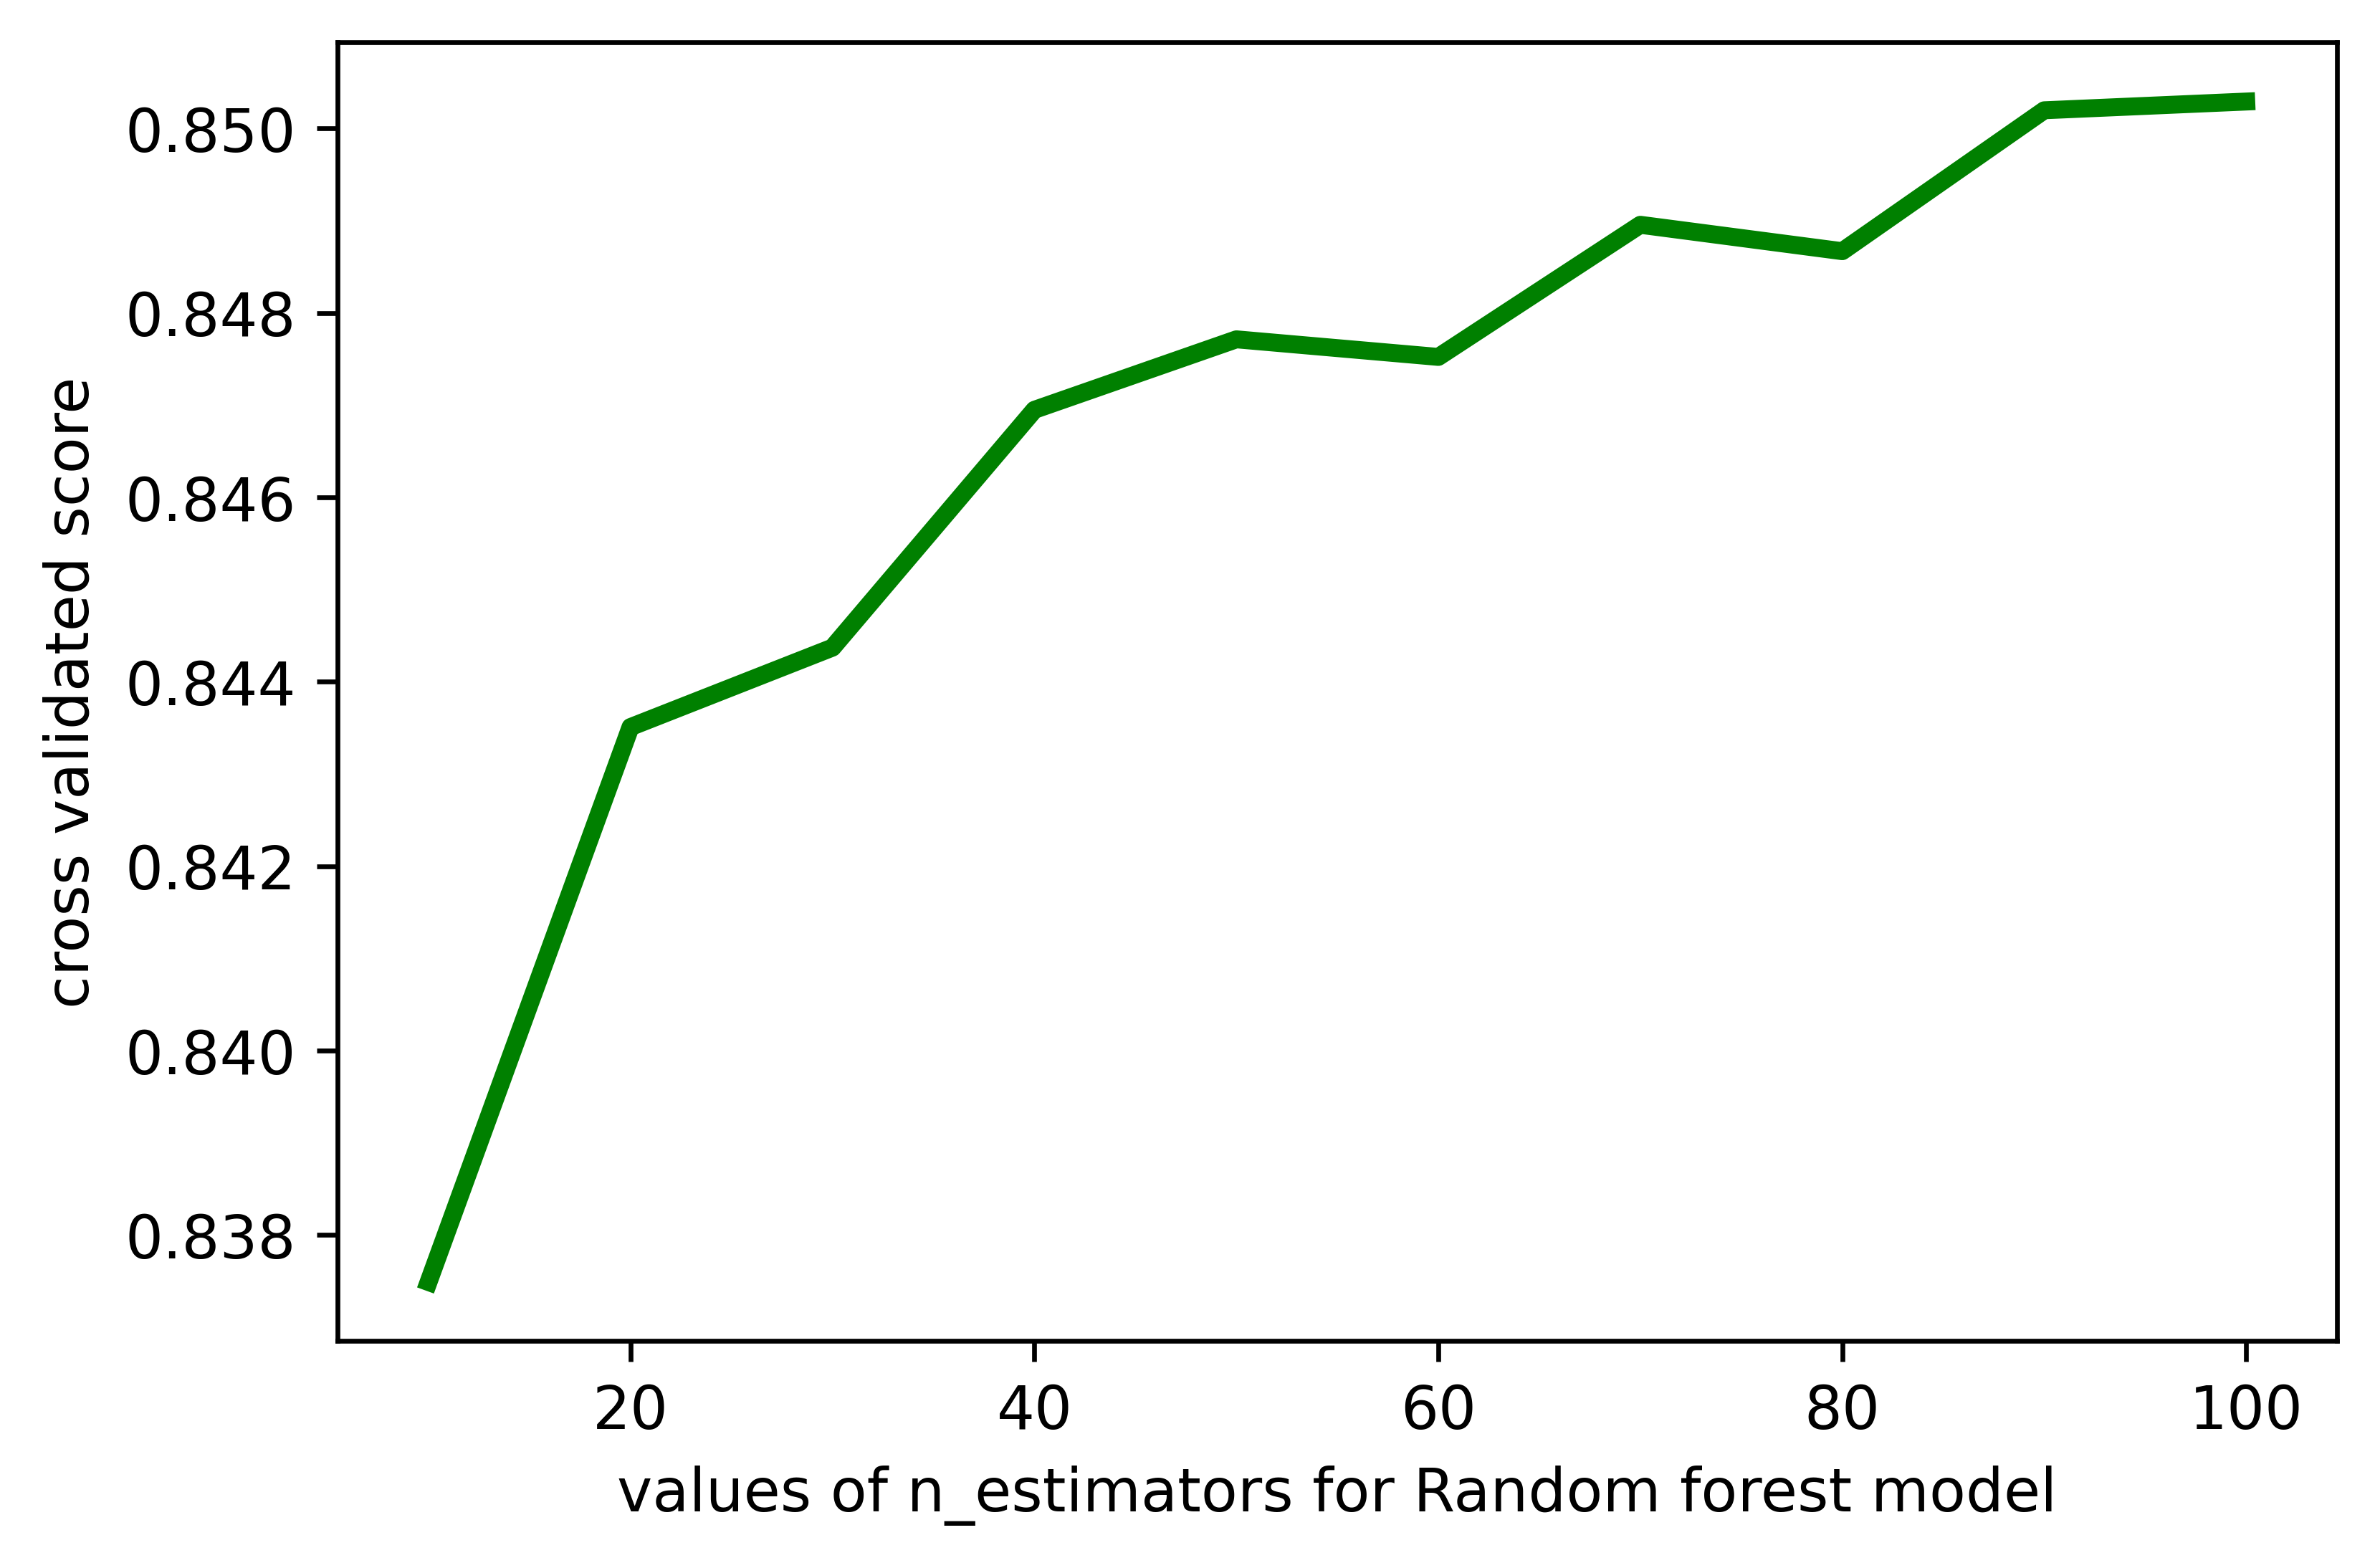

In [20]:
#plot the value of n_estimators for RandomForestClassifier (x-axis) versus the cross validated accuracy (y-axis)
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 600)
plt.plot(x, n_score, linewidth = 3, color = 'green')
plt.xlabel('values of n_estimators for Random forest model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)         
plt.savefig('desktop/RF_n_estimators_values_used.svg', format = 'svg', dpi = 600)
plt.show()

In [21]:
#computing the accuracy for each varied  max_depth value
#x = x_train_norm
#y =  y_train
k1 =[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18]
n_score_depth = []
# loop through range  values f n_stimators
for x1 in k1:
    #mpement  RandomForestClassifier with n_estimators
    classifier_score = RandomForestClassifier(n_estimators =100, max_depth = x1, min_samples_split = 6, max_features = 'auto', bootstrap = True, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add mean of scores for n_estmators to n_score list
    n_score_depth.append(scores.mean())
print( n_score_depth)

[0.819147486855826, 0.8280309214527165, 0.8343373857018413, 0.8391146697931446, 0.8429364788040491, 0.8448483420717665, 0.8479055153484142, 0.8464722114171236, 0.8502934725638764, 0.846185769776526, 0.8463767004333607, 0.8442739065088087]


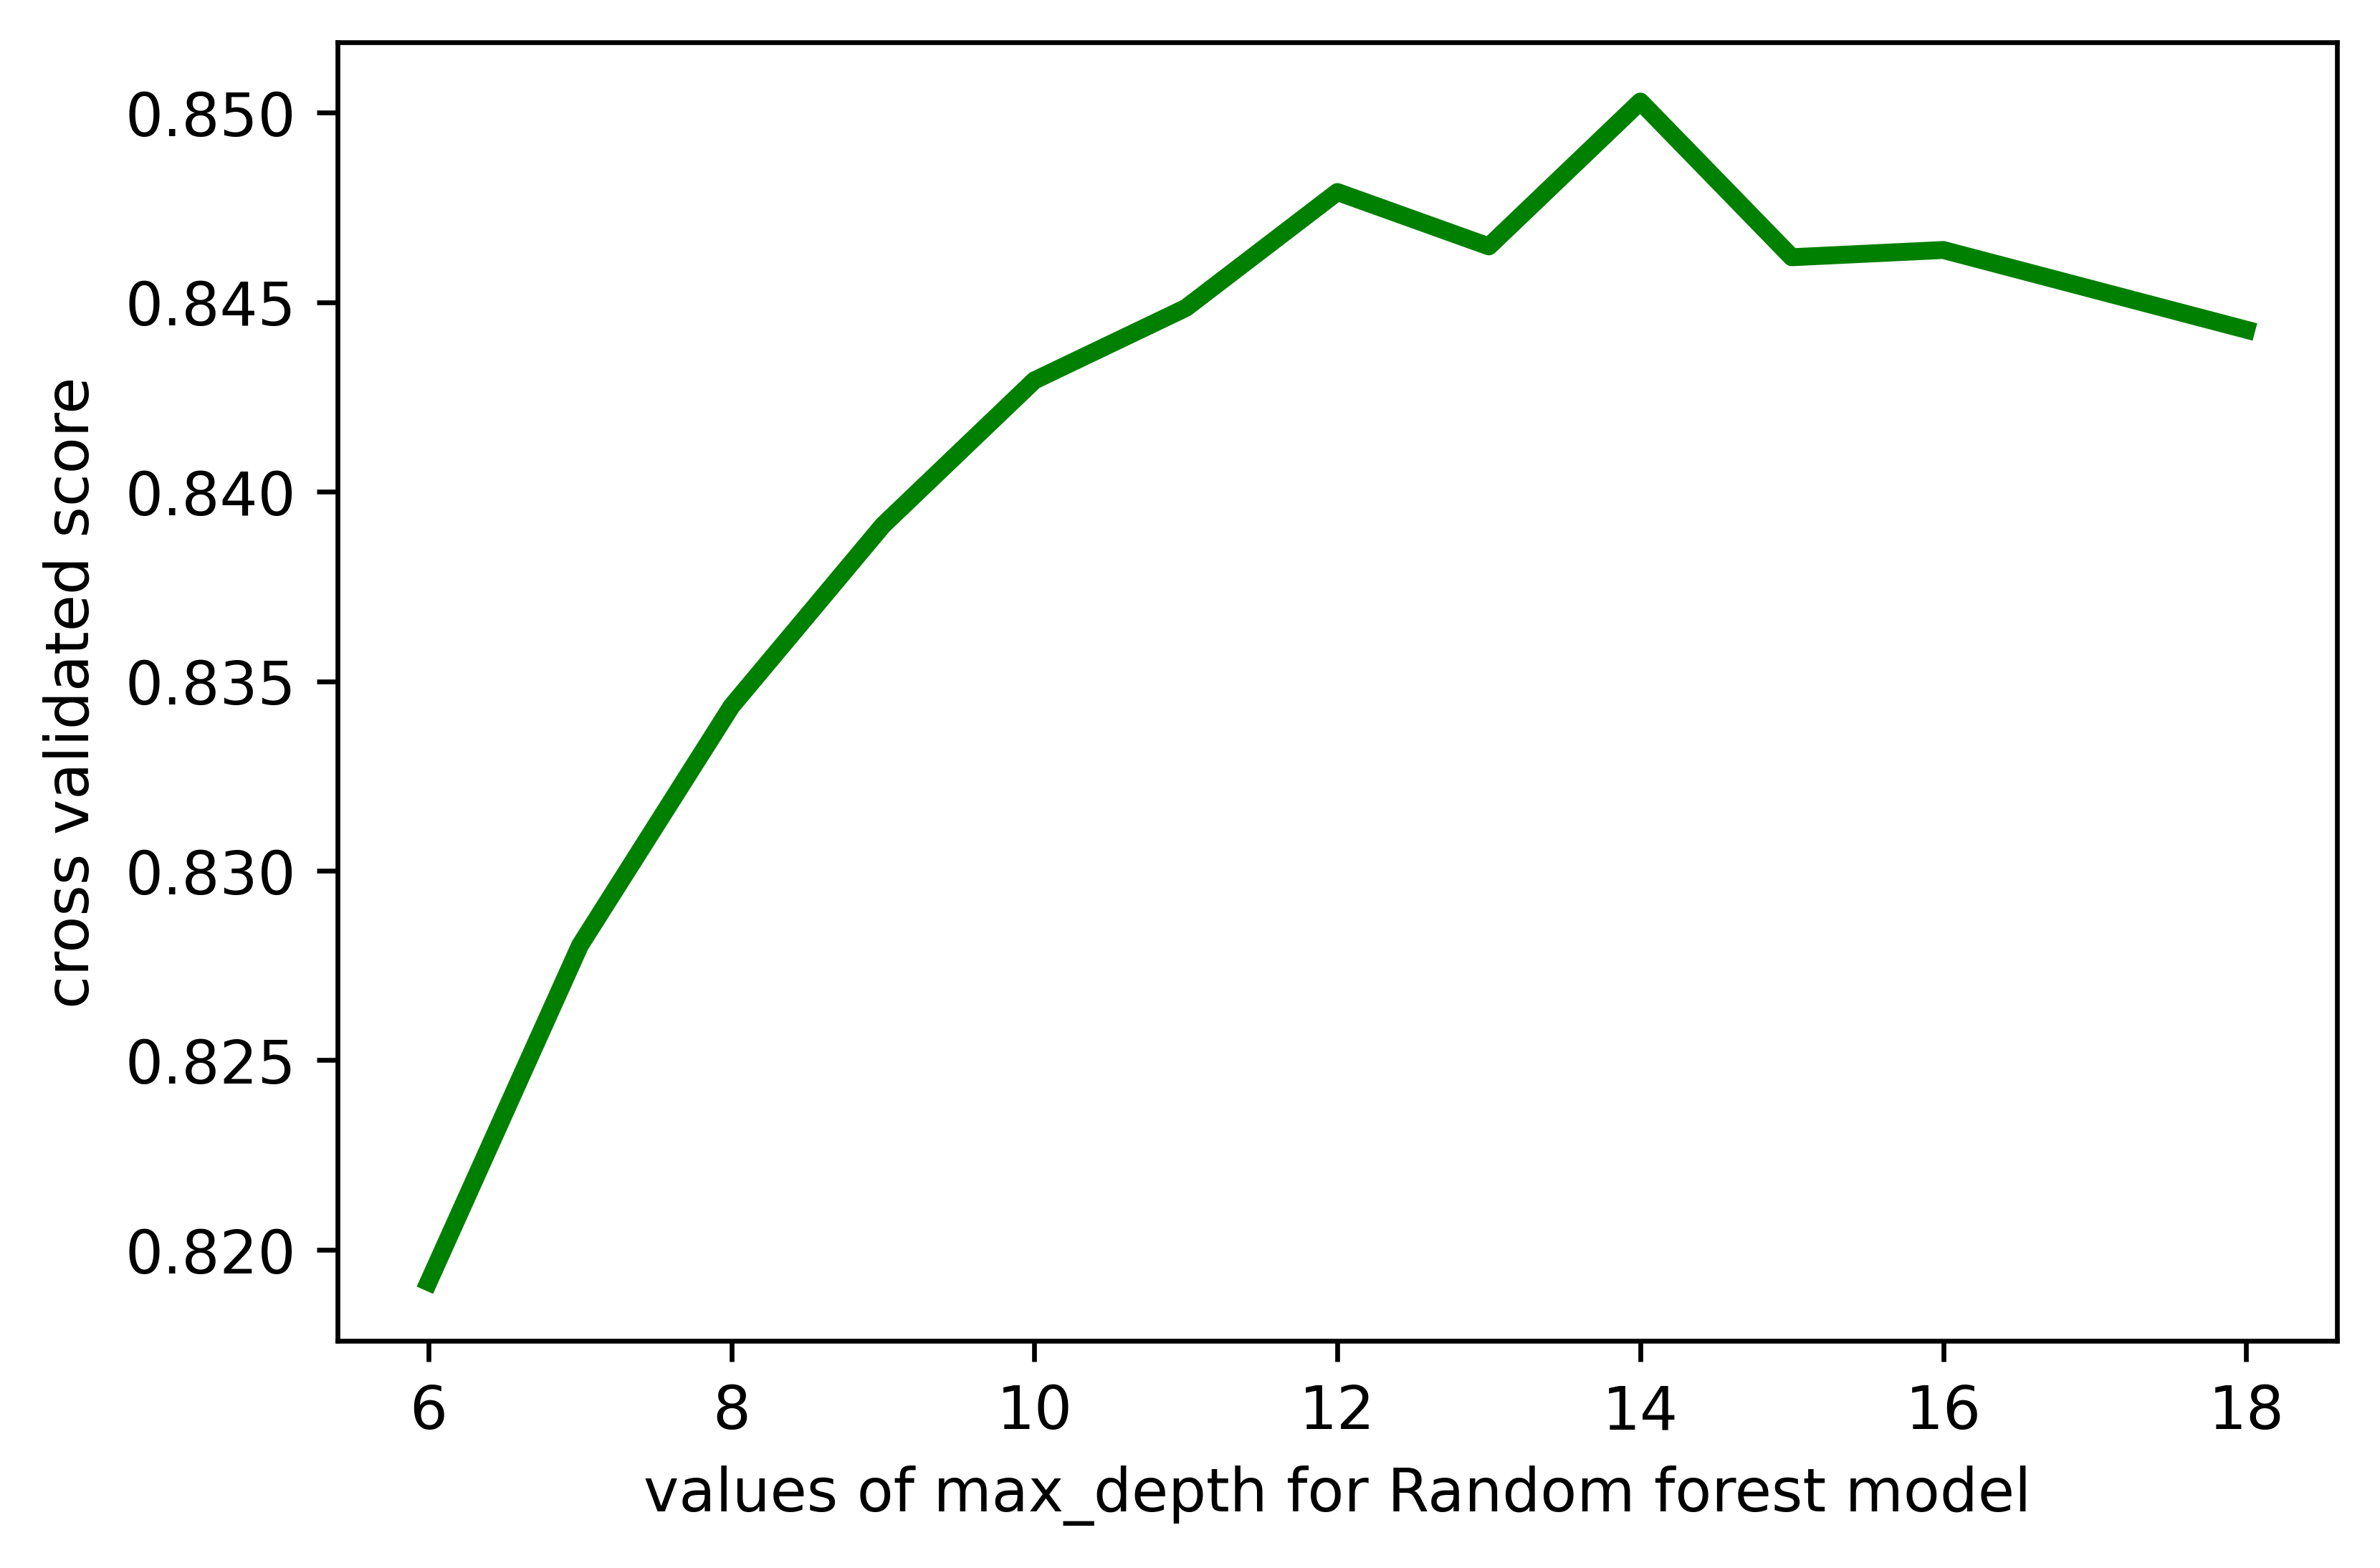

In [22]:
#plot the value of max_depth for RandomForestClassifier (x-axis) versus the cross validated accuracy (y-axis)
x = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 600)
plt.plot(x, n_score_depth, linewidth = 3, color = 'green')
plt.xlabel('values of max_depth for Random forest model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)
#plt.x
plt.savefig('desktop/RF_max_depth_values_used.svg', format = 'svg', dpi = 600)
plt.show()

In [23]:
#computing the accuracy for each varied min_samples_split value
#x = x_train_norm
#y =  y_train
k1 =[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
n_score_samples = []
# loop through range  values f n_stimators
for x1 in k1:
    #mpement  RandomForestClassifier with n_estimators
    classifier_score = RandomForestClassifier(n_estimators = 100, max_depth = 14, min_samples_split = x1, max_features = 'auto', bootstrap = True, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score_samples.append(scores.mean())
print( n_score_samples)

[0.848478581250993, 0.8502934725638764, 0.8476181606008975, 0.845803269288014, 0.8463770656761282, 0.8444662981367139, 0.8435105491242391, 0.8418858579826546, 0.8407398174881889, 0.8408353284719521, 0.8413131573228435, 0.8391151263466045, 0.8396886488026428, 0.8387334476543196]


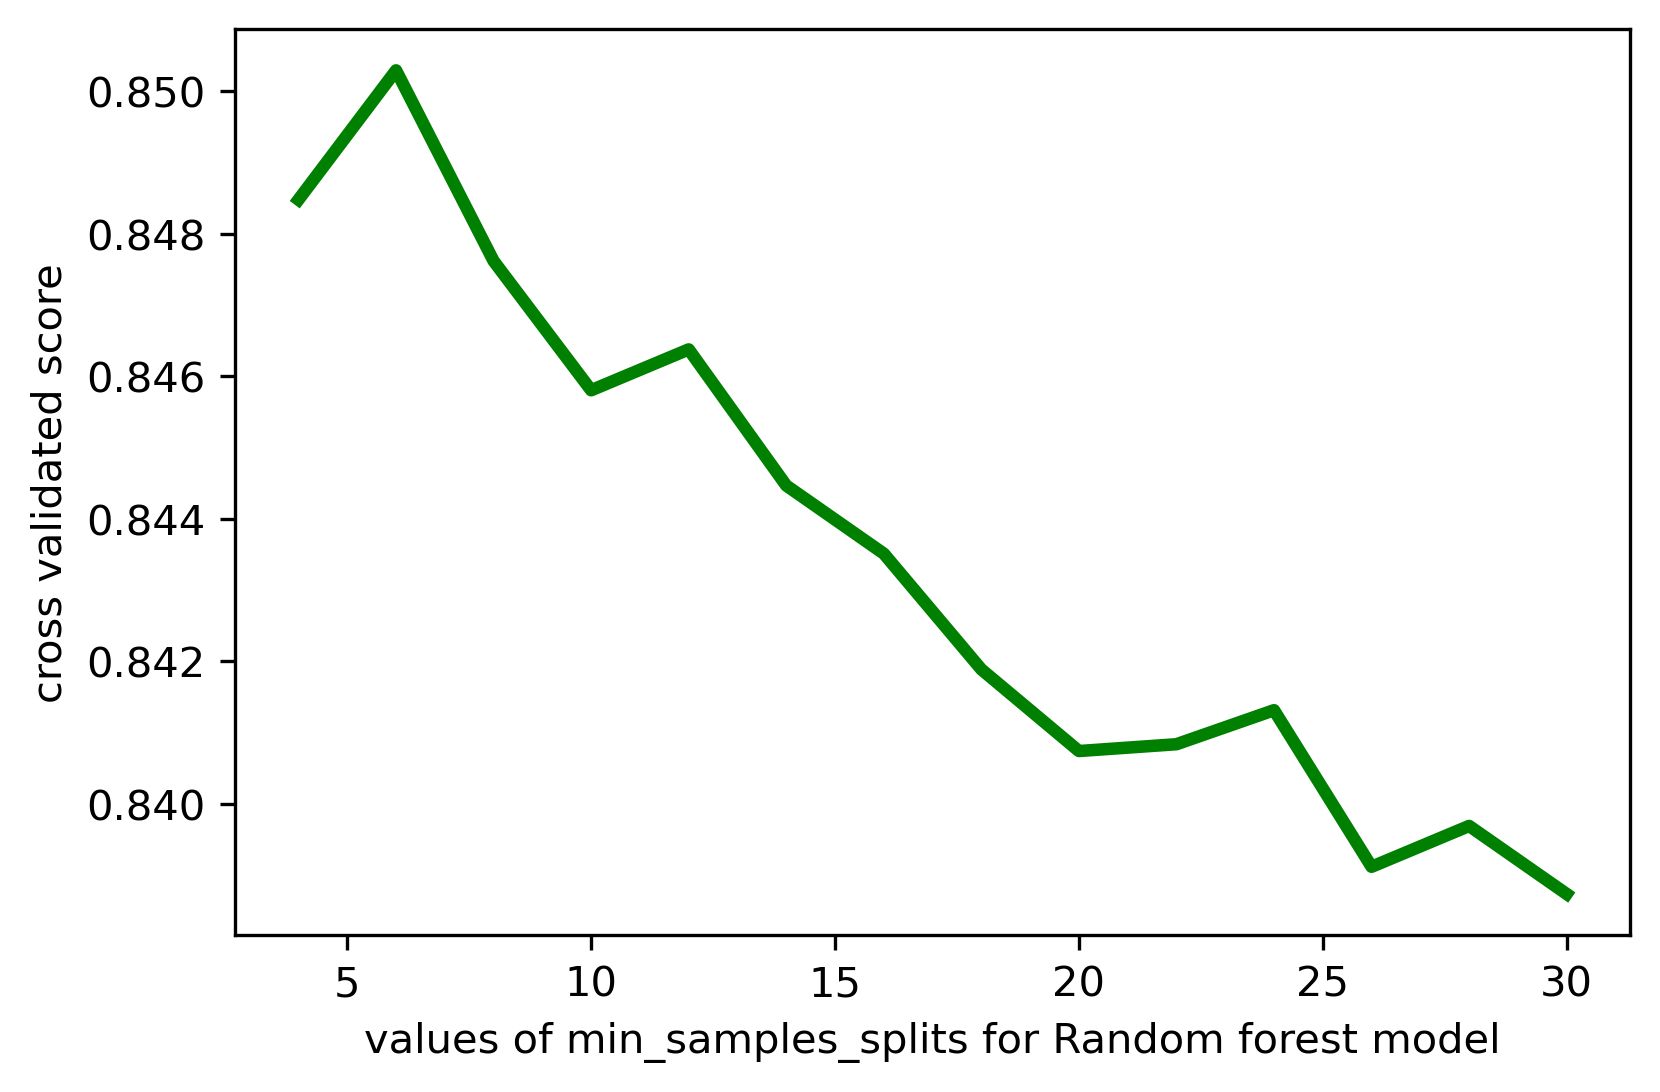

In [24]:
#plot the value of min_samples_split for RandomForestClassifier (x-axis) versus the cross validated accuracy (y-axis)
#x = [5, 10, 15, 20, 25, 30, 35, , 10, 12]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 300)
plt.plot(k1, n_score_samples, linewidth = 3, color = 'green')
plt.xlabel('values of min_samples_splits for Random forest model')
plt.ylabel('cross validated score')
#plt.ylim(0.939, 0.943)         
plt.savefig('desktop/RF_min_samples_values_used.svg', format = 'svg', dpi = 600)
plt.show()

In [16]:
#applying optimized paratemers to retrain RF Classifer using the training sets
import time
start = time.process_time()
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 14, min_samples_split = 5, max_features = 'sqrt', bootstrap = True, random_state = 0)
rf_classifier.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    #scores_3 = cross_val_score(estimator = classifier_score, X = x_train_norm, y = y_train, cv = 10)
    #add man of scores for n_estmators to n_score list
scores_rf = cross_val_score(estimator = rf_classifier, X = logs_train_norm, y = labels_train, cv = 10)
end = time.process_time()
print(end-start)

30.8125


In [17]:
#making predictions from the training data
labels_train_pred = rf_classifier.predict(logs_train_norm)

In [18]:
#computing accuracy of the model based on the training predictions and labels
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred))

Accuracy: 0.9536638960542658


In [19]:
#making predictions using the reserve testing data
labels_test_pred = rf_classifier.predict(logs_test_norm)

In [20]:
#computing the performance accurcy of the testing data
print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred))

Accuracy: 0.8452426442491402


In [21]:
#computing evaluation metrics based on training dataset
from sklearn.metrics import classification_report
print(classification_report(labels_train, labels_train_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.9150    0.9643    0.9390      3361
           1     0.9932    0.9888    0.9910       889
           2     0.9933    0.9711    0.9821       762
           3     0.9722    0.9161    0.9433       572
           4     0.9928    0.9829    0.9878       700
           5     0.9594    0.9887    0.9738       621
           6     0.9474    0.8944    0.9202      2519
           7     0.9981    1.0000    0.9990      1043

    accuracy                         0.9537     10467
   macro avg     0.9714    0.9633    0.9670     10467
weighted avg     0.9544    0.9537    0.9536     10467



In [22]:
#computing evaluation metrics based on testing dataset
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_test_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.7746    0.8308    0.8017       786
           1     0.9381    0.9120    0.9249       216
           2     0.9240    0.8729    0.8977       181
           3     0.7273    0.7482    0.7376       139
           4     0.9579    0.9146    0.9357       199
           5     0.8743    0.9444    0.9080       162
           6     0.8030    0.7416    0.7711       654
           7     0.9964    1.0000    0.9982       280

    accuracy                         0.8452      2617
   macro avg     0.8744    0.8706    0.8719      2617
weighted avg     0.8469    0.8452    0.8453      2617



In [23]:
df = pd.DataFrame({'true': labels_test, 'prediction':labels_test_pred})

In [24]:
df

,true,prediction
0,5,5
1,0,0
2,0,0
3,3,3
4,5,5
...,...,...
2612,0,0
2613,4,4
2614,4,4
2615,5,5


In [25]:
#writing to excel
from pandas import ExcelWriter
predrf = pd.ExcelWriter('Desktop\predrf.xlsx')
df.to_excel(predrf)
predrf.save()

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix # n_estimator 80
import itertools

In [28]:
#computing normalized confusion matrix for RF
cm = pd.DataFrame(confusion_matrix(labels_test, labels_test_pred), index = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'], columns = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'])
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

C:\Users\Wits-User\AppData\Local\Temp\ipykernel_192\3545513201.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]


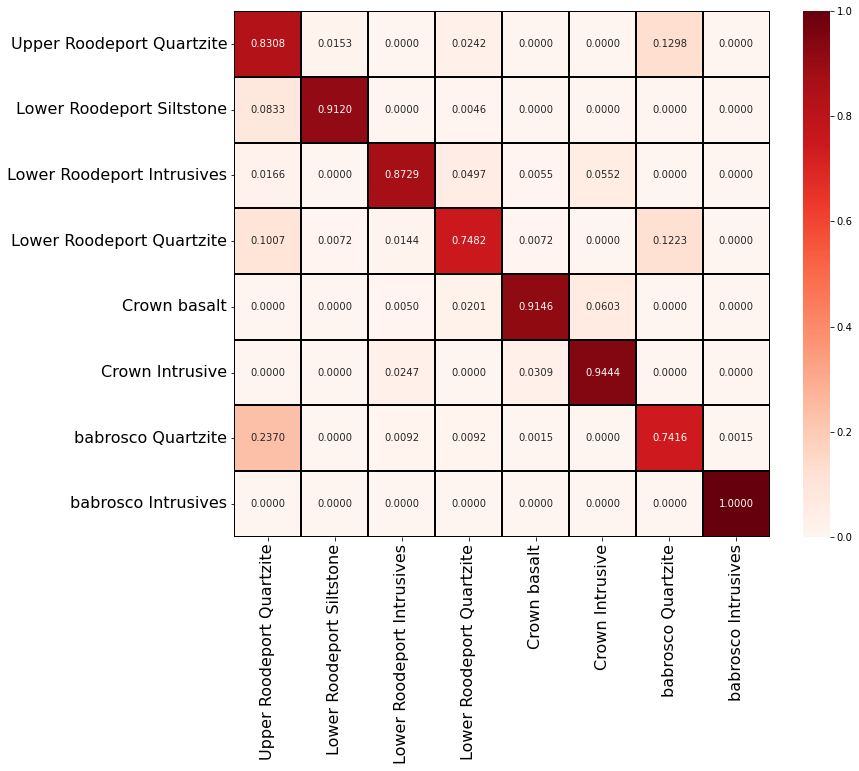

In [131]:
plt.figure(figsize = (12, 10))
sns.heatmap(cm_norm, annot = True, fmt = '.4f', linewidth = 2, linecolor = 'black', cmap = 'Reds')
plt.subplots_adjust(bottom = 0.15)
#plt.set_xticks(tickmarks, minor = True)
plt.grid(True, which = 'minor', linestyle = '-')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.tick_params(axis = 'both', width = 4, lenght = 4)
plt.savefig('desktop/used_RF_matrix.svg', format = 'png', dpi = 600)

In [16]:
#applying optimized paratemers to RF Classifer
import time
start = time.process_time()
rf_classifier_2 = RandomForestClassifier(n_estimators = 100, max_depth = 14, min_samples_split = 6, max_features = 'sqrt', bootstrap = True, random_state = 0)
rf_classifier_2.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    #scores_3 = cross_val_score(estimator = classifier_score, X = x_train_norm, y = y_train, cv = 10)
    #add man of scores for n_estmators to n_score list
scores_rf_2 = cross_val_score(estimator = rf_classifier_2, X = logs_train_norm, y = labels_train, cv = 10)
end = time.process_time()
print(end-start)

31.03125


In [17]:
labels_train_pred_2 = rf_classifier_2.predict(logs_train_norm)

In [18]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred_2))

Accuracy: 0.9492691315563199


In [19]:
labels_test_pred_2 = rf_classifier_2.predict(logs_test_norm)

In [20]:
print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred_2))

Accuracy: 0.8467711119602599


In [24]:
#CALCULATE ROC METRICS
#from sklearn.metrics import roc_curve, auc, roc_auc_score
#from sklearn.preprocessing import label_binarize
#skplt.metrics.plot_roc_curve(labels_test, labels_test_pred_2)

ModuleNotFoundError: No module named 'scikitplot'

In [32]:
from sklearn.metrics import classification_report
print(classification_report(labels_train, labels_train_pred_2, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.9088    0.9607    0.9340      3361
           1     0.9865    0.9843    0.9854       889
           2     0.9919    0.9646    0.9780       762
           3     0.9559    0.9091    0.9319       572
           4     0.9913    0.9771    0.9842       700
           5     0.9578    0.9871    0.9722       621
           6     0.9455    0.8881    0.9159      2519
           7     0.9971    1.0000    0.9986      1043

    accuracy                         0.9493     10467
   macro avg     0.9668    0.9589    0.9625     10467
weighted avg     0.9501    0.9493    0.9492     10467



In [33]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_test_pred_2, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.7735    0.8384    0.8046       786
           1     0.9381    0.9120    0.9249       216
           2     0.9349    0.8729    0.9029       181
           3     0.7246    0.7194    0.7220       139
           4     0.9579    0.9146    0.9357       199
           5     0.8743    0.9444    0.9080       162
           6     0.8090    0.7446    0.7755       654
           7     0.9964    1.0000    0.9982       280

    accuracy                         0.8468      2617
   macro avg     0.8761    0.8683    0.8715      2617
weighted avg     0.8486    0.8468    0.8468      2617



In [34]:
#creating a dataframe of predictions based on testing set
df_2 = pd.DataFrame({'true': labels_test, 'prediction':labels_test_pred_2})

In [35]:
df_2

,true,prediction
0,5,5
1,0,0
2,0,0
3,3,3
4,5,5
...,...,...
2612,0,0
2613,4,4
2614,4,4
2615,5,5


In [27]:
#writing to excel
from pandas import ExcelWriter
predrf_2 = pd.ExcelWriter('Desktop\predrf.xlsx')
df_2.to_excel(predrf_2)
predrf_2.save()

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix # n_estimator 80
import itertools

In [29]:
conda install -c conda -forge matplotlib


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py install [-h] [--revision REVISION]
                               [-n ENVIRONMENT | -p PATH] [-c CHANNEL]
                               [--use-local] [--override-channels]
                               [--repodata-fn REPODATA_FNS]
                               [--strict-channel-priority]
                               [--no-channel-priority]
                               [--no-deps | --only-deps] [--no-pin] [--copy]
                               [--no-shortcuts] [-C] [-k] [--offline] [-d]
                               [--json] [-q] [-v] [-y] [--download-only]
                               [--show-channel-urls] [--file FILE]
                               [--experimental-solver {classic,libmamba,libmamba-draft}]
                               [--force-reinstall]
                               [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                               [-m] [--clobber] [--dev]
                               [packa

In [23]:
cm = pd.DataFrame(confusion_matrix(labels_test, labels_test_pred_2), index = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'], columns = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'])
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

C:\Users\Obehi\AppData\Local\Temp\ipykernel_14648\578160696.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]


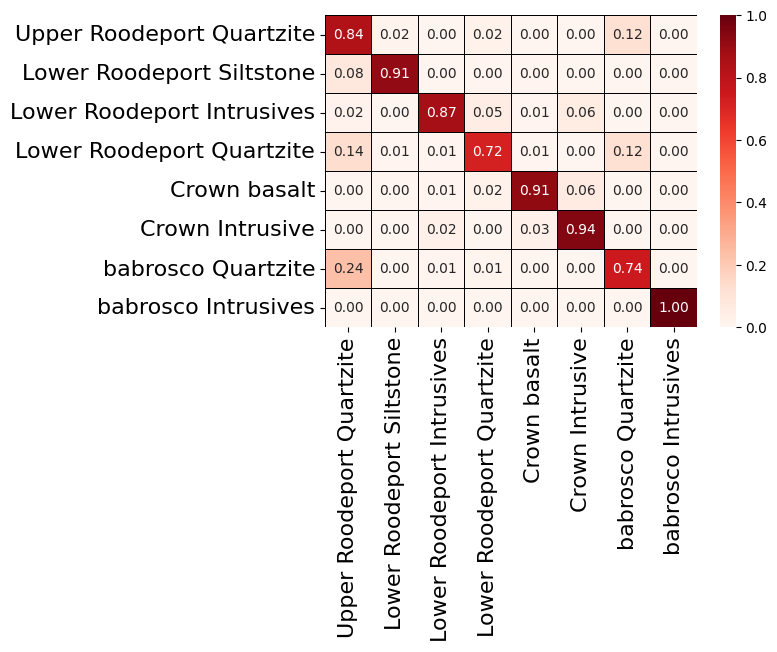

In [27]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm_norm, annot = True, fmt = '.2f',linewidth = 0.5, linecolor = 'black', cmap = 'Reds')
plt.subplots_adjust(bottom = 0.1)
#plt.set_xticks(tickmarks, minor = True)
plt.grid(True, which = 'minor', linestyle = '-')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.tick_params(axis = 'both', width = 4, lenght = 4)
plt.savefig('paper_used_2_RF_matrix.svg', format = 'svg', dpi = 600)

In [65]:
rf_strata_pred = pd.read_excel("a_predrf.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'a_predrf.xlsx'

In [44]:
rf_strata_pred

,number,true,prediction
0,7959,5,5
1,2070,0,0
2,1453,0,0
3,6308,3,3
4,7985,5,5
...,...,...,...
2612,773,0,0
2613,8175,4,4
2614,7276,4,4
2615,7683,5,5


In [45]:
rf_strata_pred = rf_strata_pred.sort_values("number", axis = 0, ascending = True)

In [46]:
rf_strata_pred

,number,true,prediction
1401,14,0,0
1048,16,0,0
599,18,0,0
2103,32,0,0
385,33,0,0
...,...,...,...
1864,13069,6,6
2299,13070,6,6
2199,13072,6,6
911,13079,6,6


In [47]:
from pandas import ExcelWriter

In [48]:
from pandas import ExcelWriter
strata_a_rf_predictn = pd.ExcelWriter('desktop\strata_a_rf_predictn.xlsx')
rf_strata_pred.to_excel(strata_a_rf_predictn)
strata_a_rf_predictn.save()

In [36]:
#feature importance
feature_importance = pd.Series(rf_classifier_2.feature_importances_, index = features).sort_values(ascending = False)
feature_importance

vp         0.324254
Gamma      0.266646
Vs         0.232784
Density    0.176317
dtype: float64

In [37]:
from sklearn.inspection import permutation_importance

In [38]:
feature_importance_2 = permutation_importance(rf_classifier_2,logs_test_norm, labels_test, n_repeats = 10, random_state = 0, n_jobs = -1)
feature_importance_2 = pd.Series(feature_importance_2.importances_mean, index=features)
feature_importance_2

Gamma      0.256477
Density    0.119832
vp         0.486358
Vs         0.241001
dtype: float64

In [39]:
import pandas as pd
import numpy as np
df_feature_importance = pd.read_excel("RF_features_importance.xlsx")
df_feature_importance

,features,importance
0,vp,0.486358
1,gamma,0.256477
2,vs,0.241001
3,density,0.119832


<Figure size 1152x864 with 0 Axes>

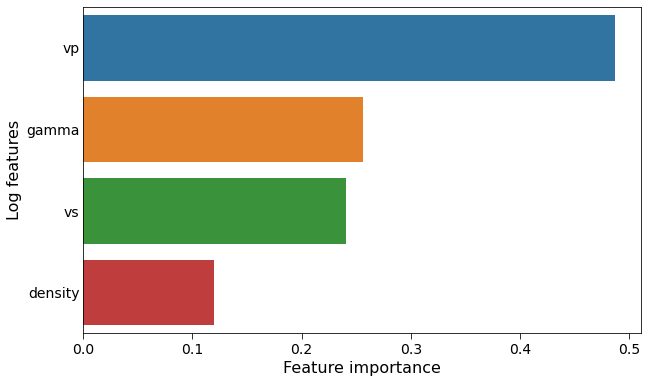

In [60]:
#bar ploting of feature_importance
plt.figure(figsize = (16, 12))
fig, bar_plt =plt.subplots(figsize = (10, 6)) 
bar_plt = sns.barplot(x = df_feature_importance.importance, y = df_feature_importance.features, data = df_feature_importance) 
#plt.ylim(min_y, max_y)
plt.tick_params(labelsize = 14, length = 6)
plt.tick_params(axis = 'y', length = 0)
#plt.yticks(())
plt.xlabel("Feature importance", fontsize = 16) 
plt.ylabel("Log features", fontsize = 16) 
#bar_plt.set_box_aspect(10/len(bar_plt.patches))
#plt.title("K-means Clustering on PCA Components", fontsize = 20)
#plt.legend(fontsize = 26, markerscale = 4) 
plt.savefig('desktop/RF_FEATURE_IMPORTANCE.svg', format = 'svg', dpi = 800)

In [40]:
import matplotlib as mpl
import matplotlib.colors
import numpy as np
clr = sns.color_palette("Purples_r")
c_clr = mpl.colors.ListedColormap(clr)

<Figure size 1152x864 with 0 Axes>

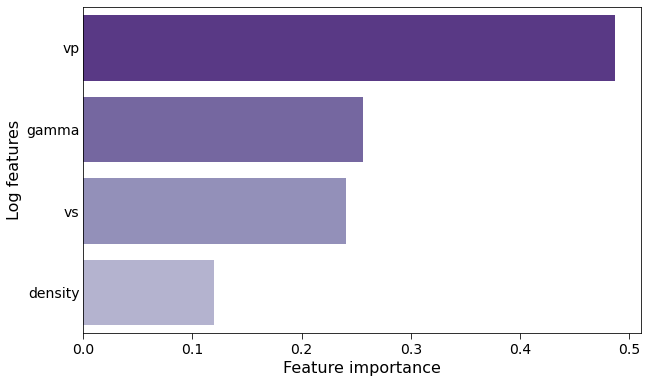

In [42]:
plt.figure(figsize = (16, 12))
fig, bar_plt =plt.subplots(figsize = (10, 6)) 
bar_plt = sns.barplot(x = df_feature_importance.importance, y = df_feature_importance.features, data = df_feature_importance, palette = clr) 
#plt.ylim(min_y, max_y)
plt.tick_params(labelsize = 14, length = 6)
plt.tick_params(axis = 'y', length = 0)
#plt.yticks(())
plt.xlabel("Feature importance", fontsize = 16) 
plt.ylabel("Log features", fontsize = 16) 
#bar_plt.set_box_aspect(10/len(bar_plt.patches))
#plt.title("K-means Clustering on PCA Components", fontsize = 20)
#plt.legend(fontsize = 26, markerscale = 4) 
#plt.savefig('desktop/GBDT_FEATURE_IMPORTANCE.png', format = 'png', dpi = 400)
plt.savefig('desktop/RF_FEATURE_IMPORTANCE.svg', format = 'svg', dpi = 800)

In [70]:
!pip3 install  pdpbox==0.2.0 --user

In [71]:
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcal

In [72]:
#importing modules to create partial dependence plots
from pdpbox import pdp, get_dataset, info_plots

In [73]:
pd_train = pd.DataFrame(logs_train, columns = ['Gamma', 'Density', 'vp', 'Vs'])

In [74]:
pd_test = pd.DataFrame(logs_test, columns = ['Gamma', 'Density', 'vp', 'Vs'])

In [75]:
#applying optimized paratemers to RF Classifer
import time
start = time.process_time()
rf_classifier_3 = RandomForestClassifier(n_estimators = 100, max_depth = 14, min_samples_split = 6, max_features = 'sqrt', bootstrap = True, random_state = 0)
rf_classifier_3.fit(pd_train, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    #scores_3 = cross_val_score(estimator = classifier_score, X = x_train_norm, y = y_train, cv = 10)
    #add man of scores for n_estmators to n_score list
scores_rf_3 = cross_val_score(estimator = rf_classifier_3, X = pd_train, y = labels_train, cv = 10)
end = time.process_time()
print(end-start)

29.1875


In [76]:
labels_train_pred_pd = rf_classifier_3.predict(pd_train)

In [77]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred_pd))

Accuracy: 0.9492691315563199


In [78]:
labels_test_pred_pd = rf_classifier_3.predict(pd_test)

In [79]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred_pd))

Accuracy: 0.8467711119602599


In [80]:
#plotting partial dependence plot of vs feature for all classes of lithology
#pdp_Vs = pdp.PDPIsolate(model = rf_classifier_3, df = pd_train, model_features = features, feature = 'Vs', feature_name = 'Vs', num_grid_points = 10)

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

In [87]:
fig, axes = pdp.InfoPlot(pdp_Vs, 'Vs')
fig.set_figwidth (20)
fig.set_figheight(18)
#fig.set_figlabels(20)
#plt.savefig('desktop/rf_vs_pdp.svg', format = 'svg', dpi = 800)
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'InfoPlot'

In [24]:
pdp_Vs = pdp.pdp_isolate(model = rf_classifier_3,   dataset = pd_train, model_features = features, feature = 'Vs', num_grid_points = 10)

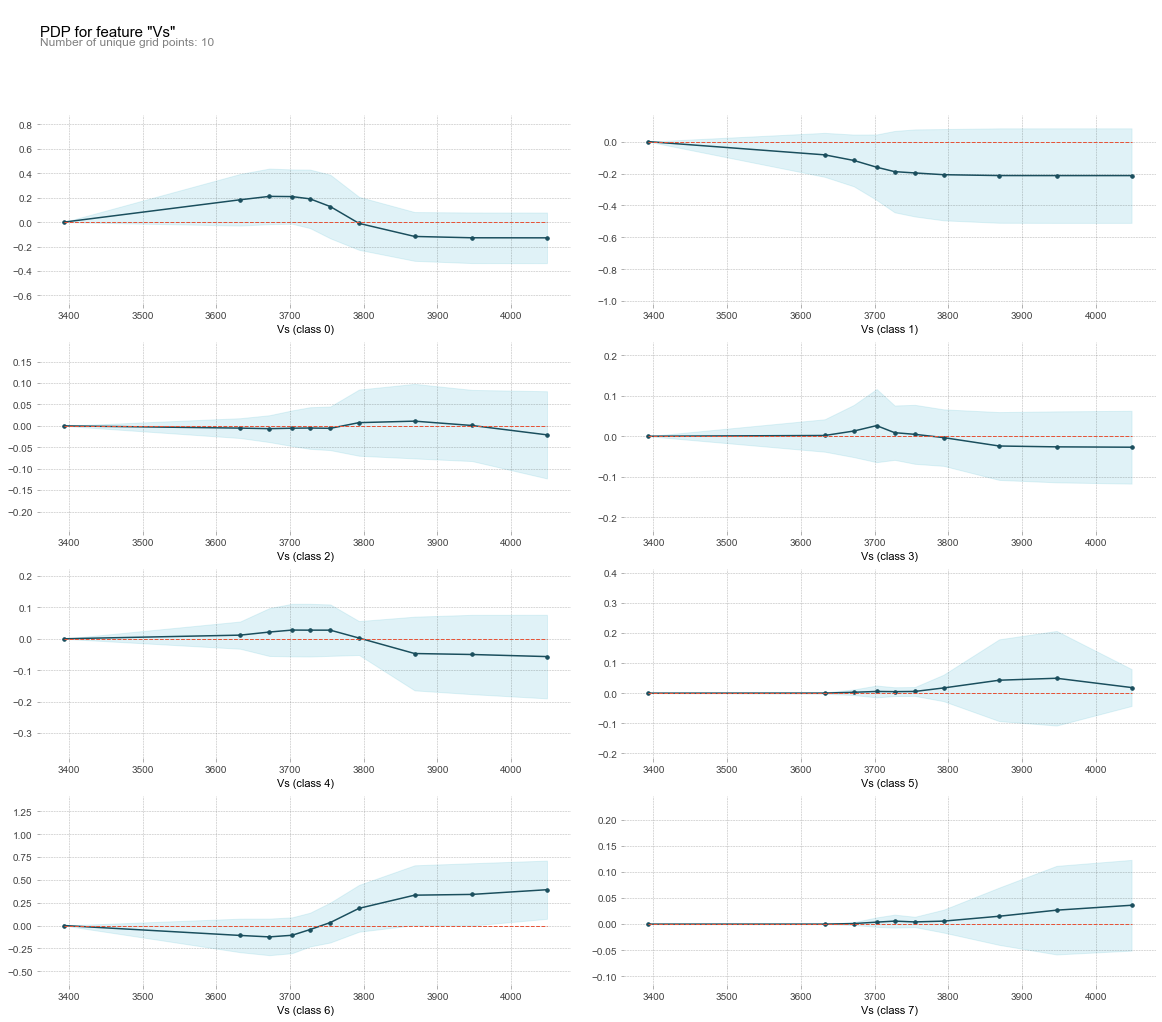

In [84]:
#plotting partial dependence plot of vs feature for all classes of lithology
fig, axes = pdp.pdp_plot(pdp_Vs, 'Vs')
fig.set_figwidth (20)
fig.set_figheight(18)
#fig.set_figlabels(20)
plt.savefig('desktop/rf_vs_pdp.svg', format = 'svg', dpi = 800)
plt.show()


In [65]:
#plotting partial dependence plot of vp feature for all classes of lithology
pdp_vp = pdp.pdp_isolate(model = rf_classifier_3,   dataset = pd_train, model_features = features, feature = 'vp', n_jobs = 10)

AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

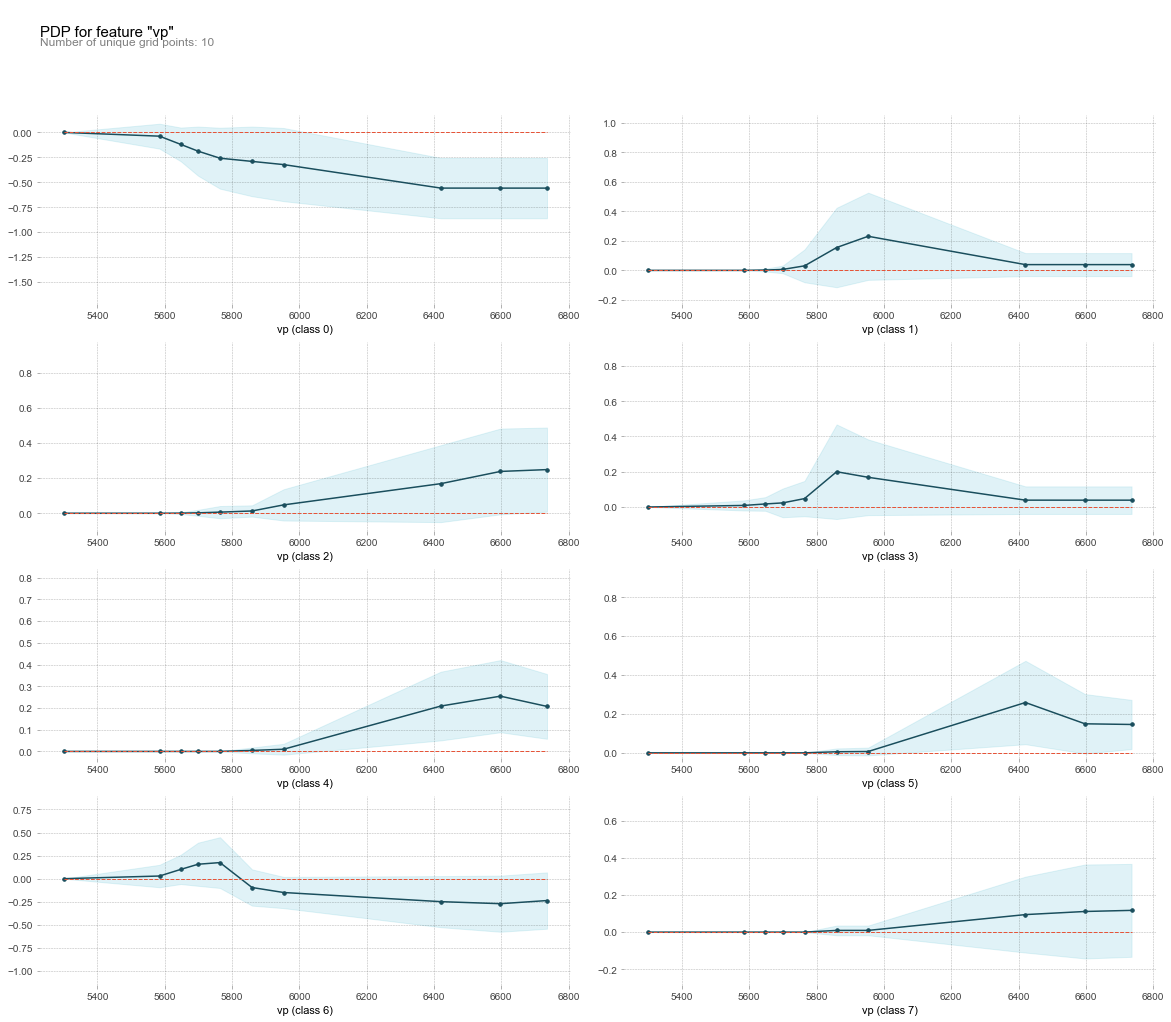

In [82]:
fig, axes = pdp.pdp_plot(pdp_vp, 'vp')
fig.set_figwidth (20)
fig.set_figheight(18)
#fig.set_figlabels(20)
plt.savefig('desktop/rf_vp_pdp.svg', format = 'svg', dpi = 800)
plt.show()


In [79]:
##plotting partial dependence plot of density feature for all classes of lithology
pdp_density = pdp.pdp_isolate(model = rf_classifier_3,   dataset = pd_train, model_features = features, feature = 'Density', n_jobs = 10)

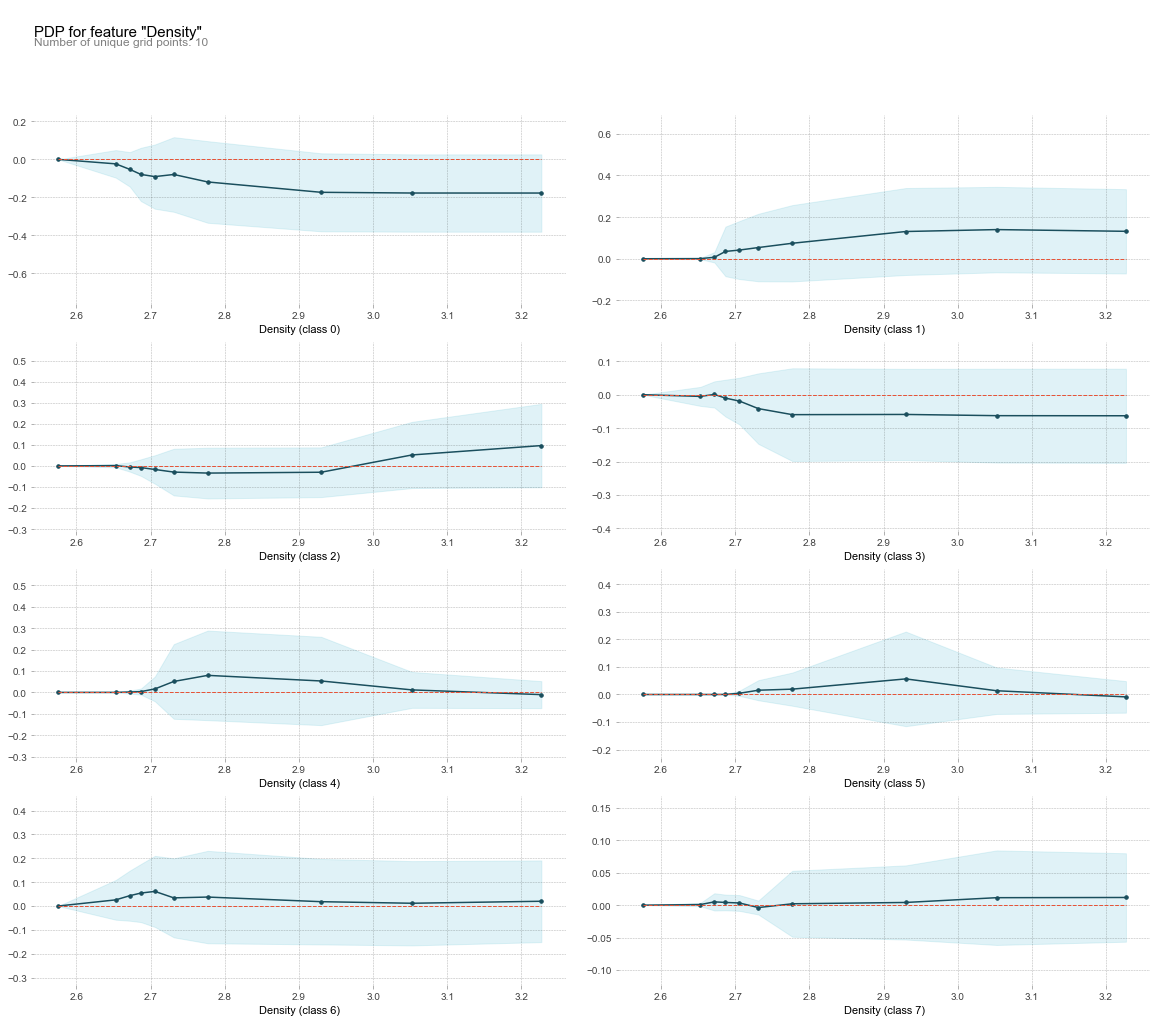

In [80]:
fig, axes = pdp.pdp_plot(pdp_density, 'Density')
fig.set_figwidth (20)
fig.set_figheight(18)
#fig.set_figlabels(20)
plt.savefig('desktop/rf_density_pdp.svg', format = 'svg', dpi = 800)
plt.show()


In [41]:
##plotting partial dependence plot of gamma feature for all classes of lithology
pdp_gamma = pdp.pdp_isolate(model = rf_classifier_3,   dataset = pd_test, model_features = features, feature = 'Gamma', n_jobs = 10)

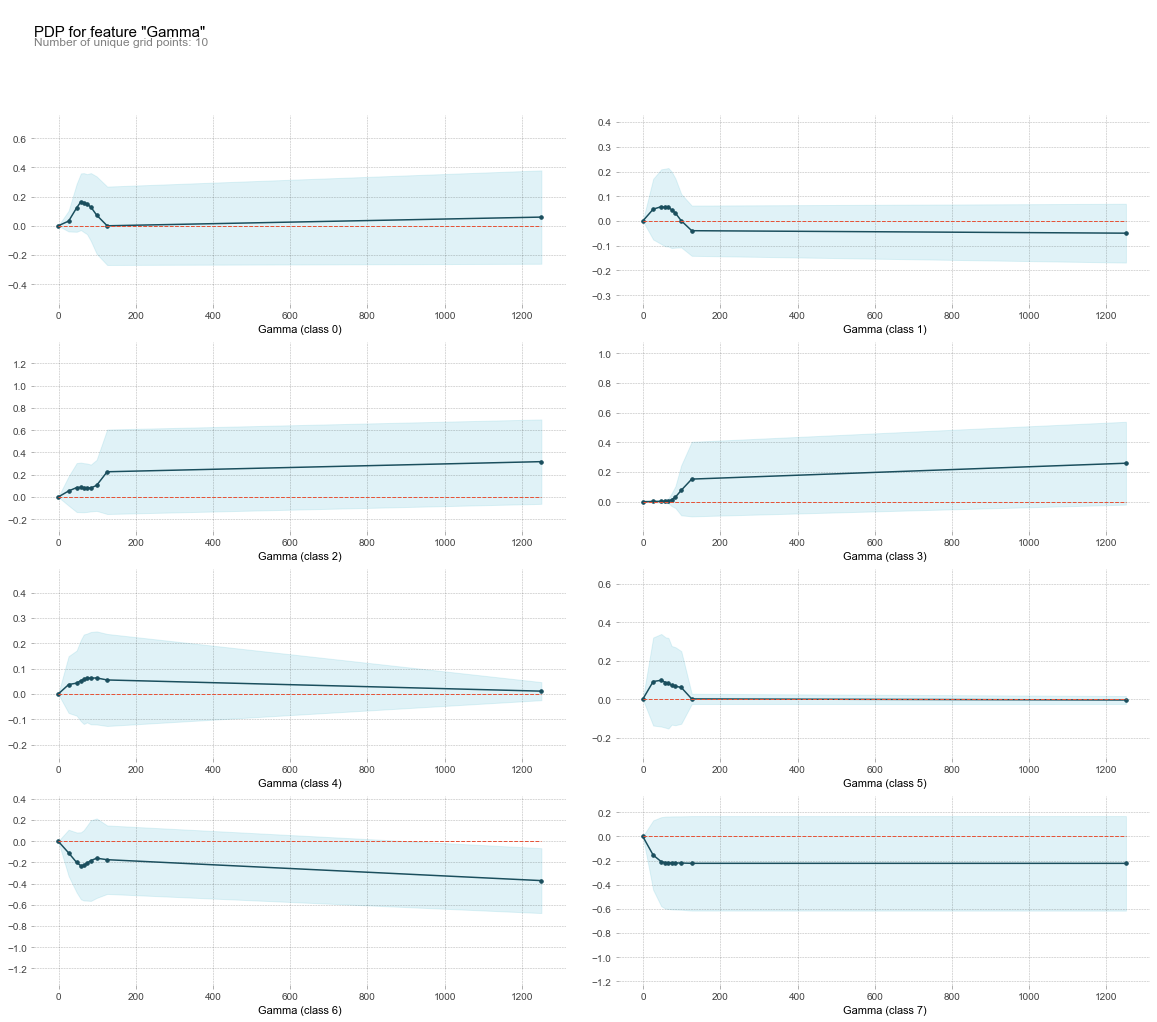

In [42]:
fig, axes = pdp.pdp_plot(pdp_gamma, 'Gamma')
fig.set_figwidth (20)
fig.set_figheight(18)
#fig.set_figlabels(20)
#plt.savefig('desktop/rf_gamma_pdp.svg', format = 'svg', dpi = 800)
plt.show()


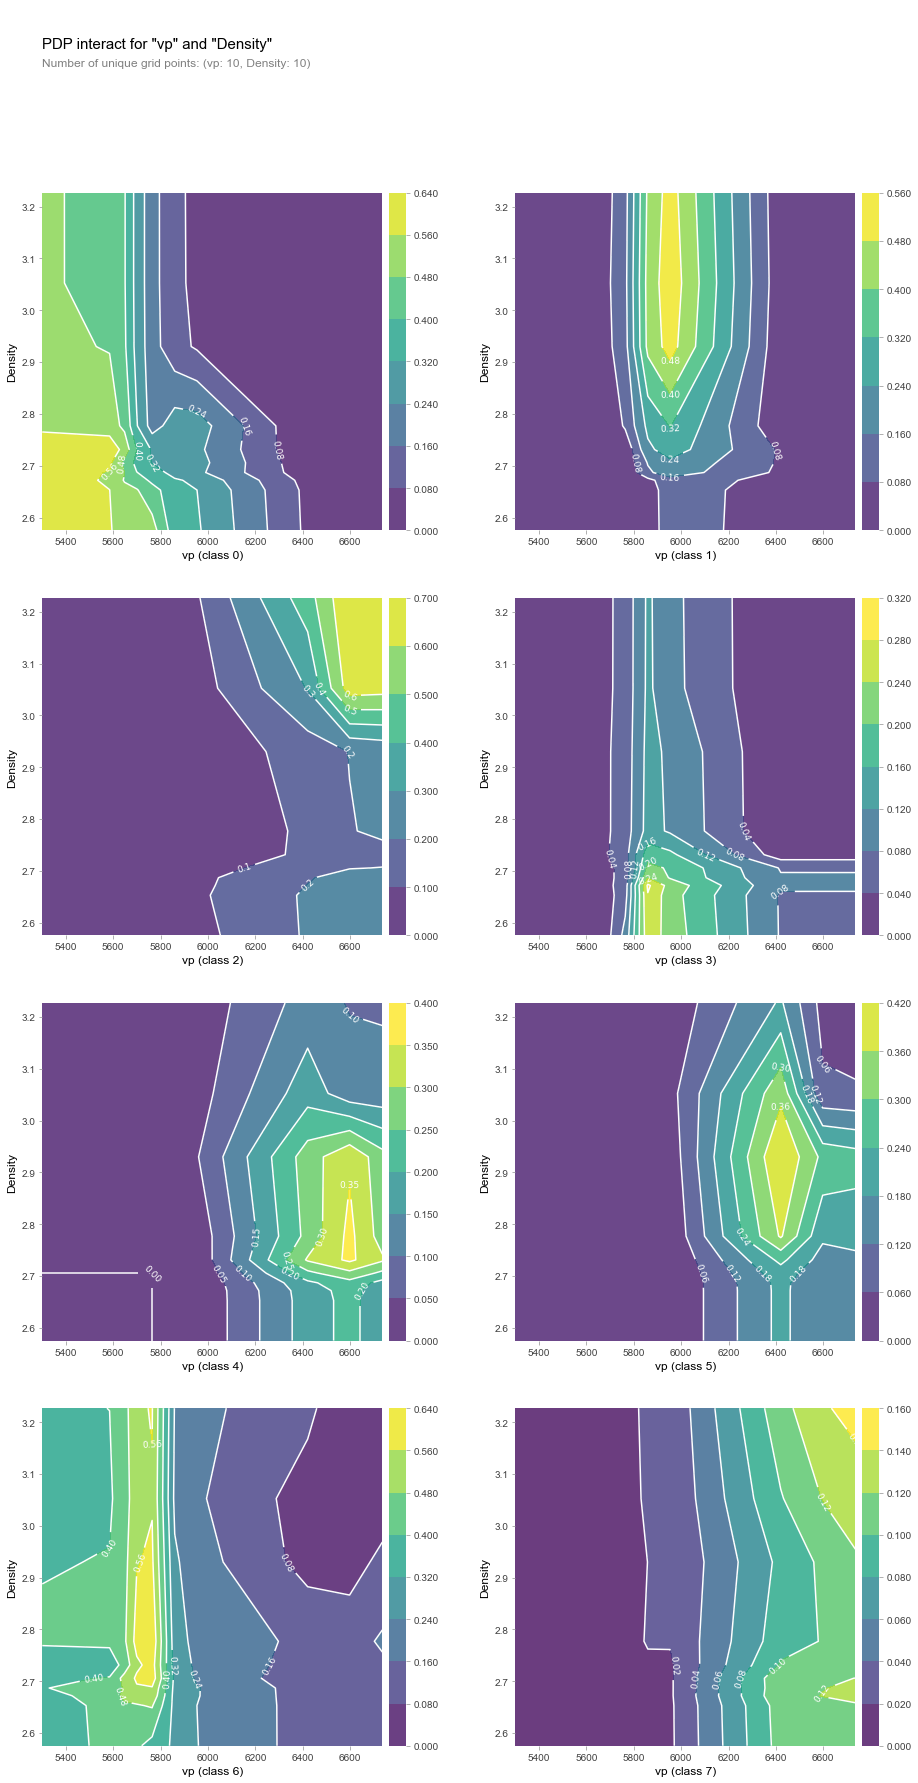

In [74]:
#plotting of interactions between logging features
feature_interactn = ['vp', 'Density']
pdp_vp_den = pdp.pdp_interact(model = rf_classifier_3,   dataset = pd_train, model_features = features, features = feature_interactn)
fig, axes = pdp.pdp_interact_plot(pdp_vp_den, feature_interactn, plot_type = 'contour')
#fig.set_figwidth (20)
#fig.set_figheight(18)
plt.savefig('desktop/rf_vp_density_pdp.svg', format = 'svg', dpi = 800)
plt.show()

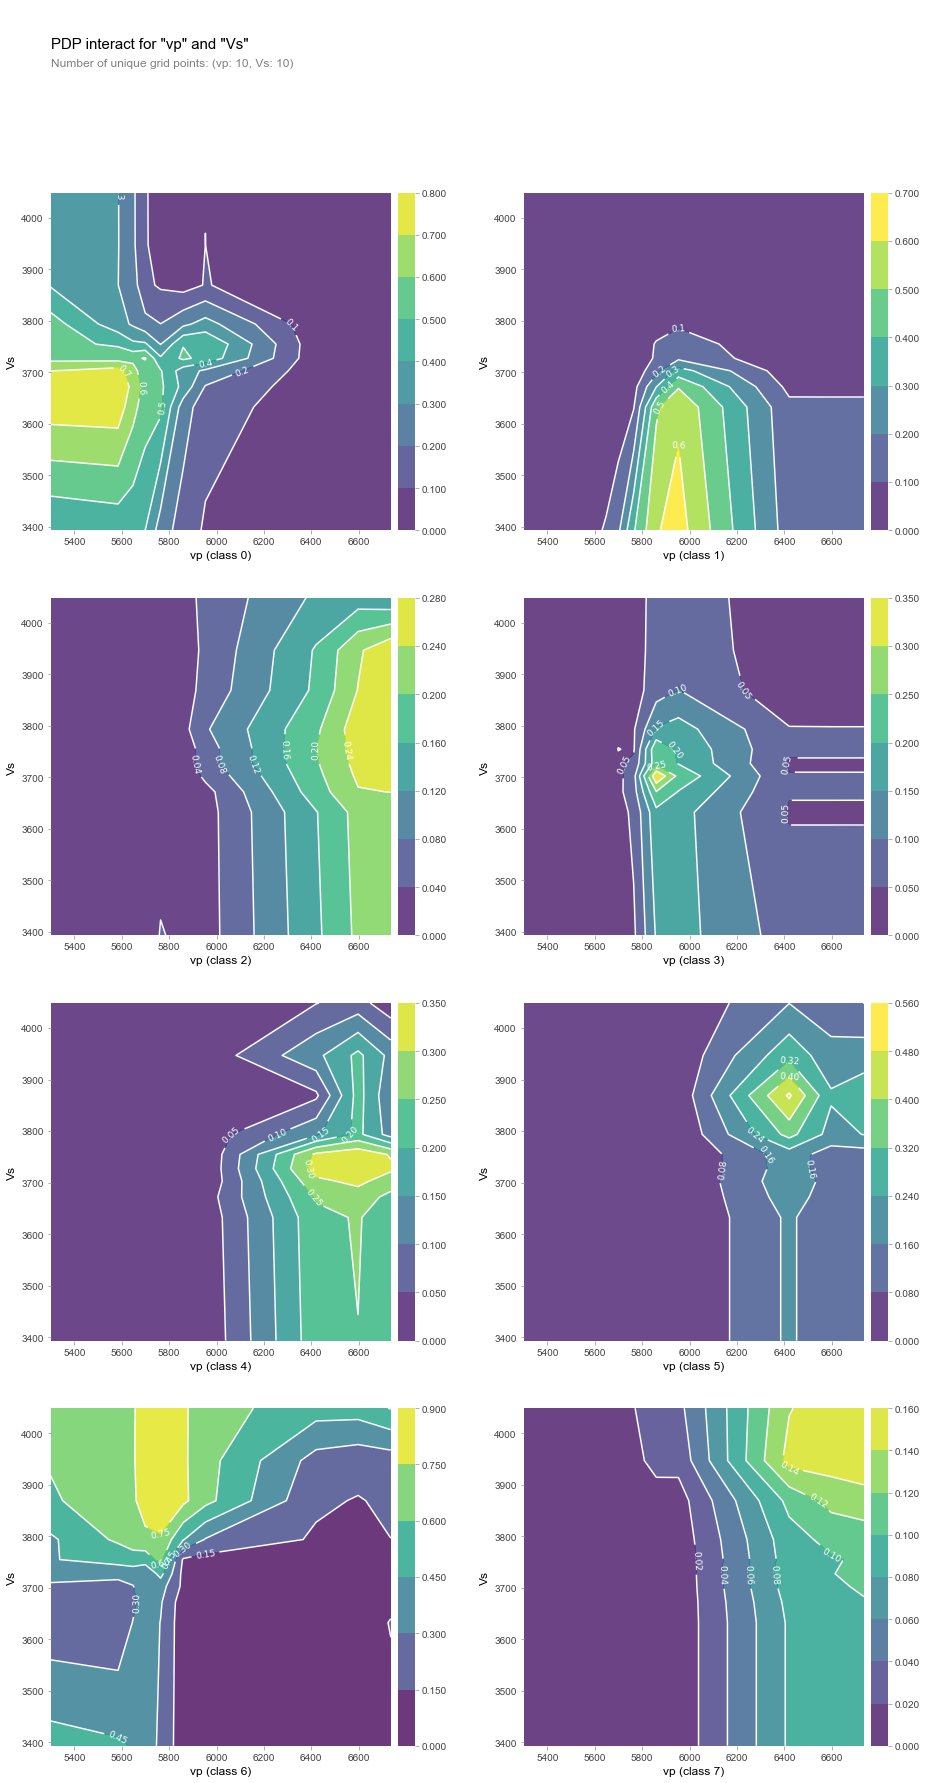

In [36]:
##plotting of interactions between logging features
feature_interactn = ['vp', 'Vs']
pdp_vp_den = pdp.pdp_interact(model = rf_classifier_3, dataset = pd_train, model_features = features, features = feature_interactn)
fig, axes = pdp.pdp_interact_plot(pdp_vp_den, feature_interactn, plot_type = 'contour')
#fig.set_figwidth (20)
#fig.set_figheight(18)
plt.savefig('desktop/rf_vp_vs_pdp.svg', format = 'svg', dpi = 400)
plt.show()

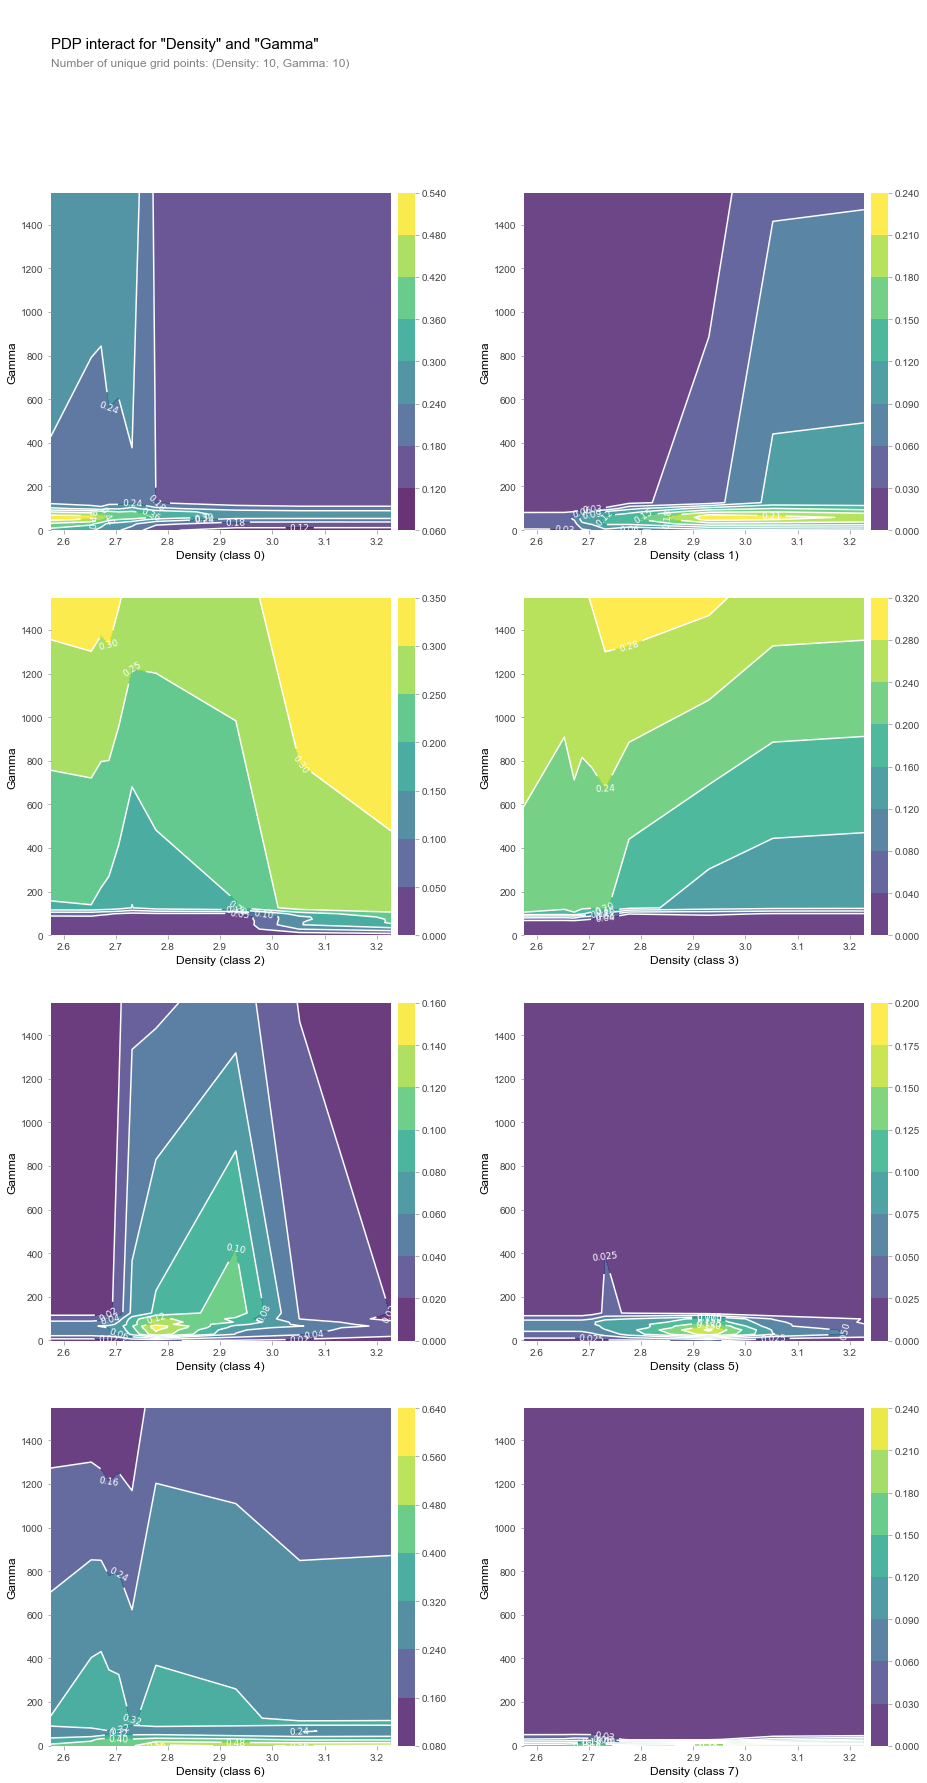

In [86]:
##plotting of interactions between logging features
feature_interactn = ['Density', 'Gamma']
pdp_den_gamma = pdp.pdp_interact(model = rf_classifier_3,   dataset = pd_train, model_features = features, features = feature_interactn)
fig, axes = pdp.pdp_interact_plot(pdp_den_gamma, feature_interactn, plot_type = 'contour')
#fig.set_figwidth (20)
#fig.set_figheight(18)
plt.savefig('desktop/rf_density_gamma_pdp.svg', format = 'svg', dpi = 400)
plt.show()

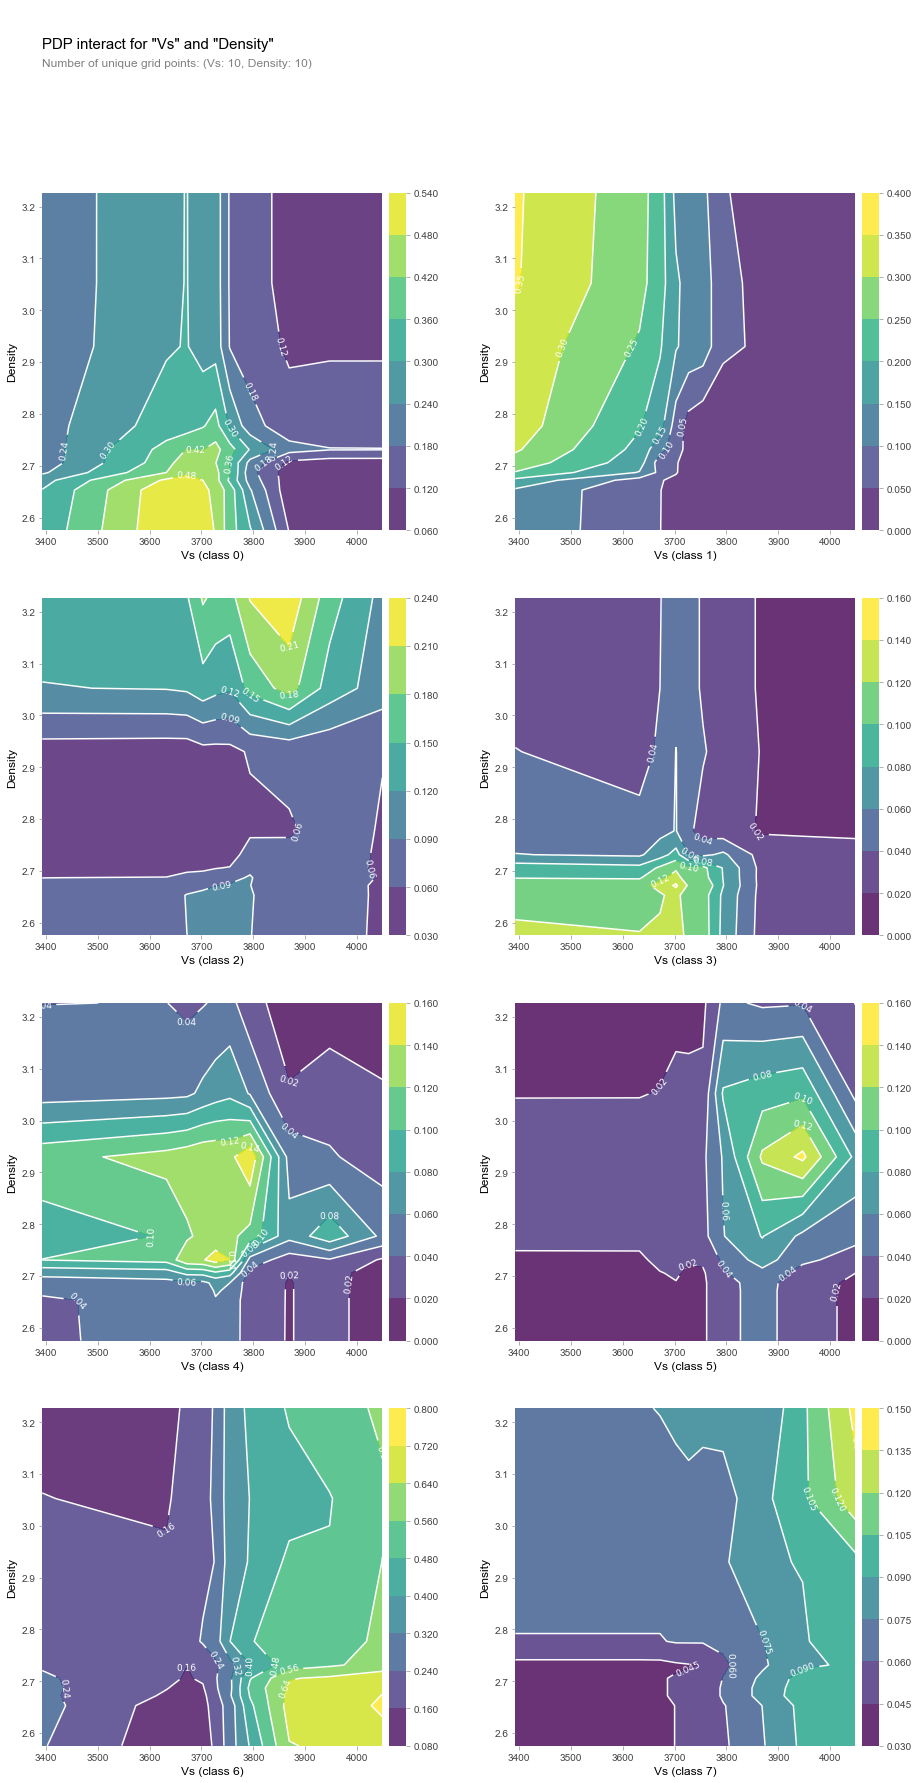

In [90]:
#plotting of interactions between logging features
feature_interactn = ['Vs', 'Density']
pdp_vs_den = pdp.pdp_interact(model = rf_classifier_3,   dataset = pd_train, model_features = features, features = feature_interactn)
fig, axes = pdp.pdp_interact_plot(pdp_vs_den, feature_interactn, plot_type = 'contour')
#fig.set_figwidth (20)
#fig.set_figheight(18)
plt.savefig('desktop/rf_vs_density_pdp.svg', format = 'svg', dpi = 800)
plt.show()

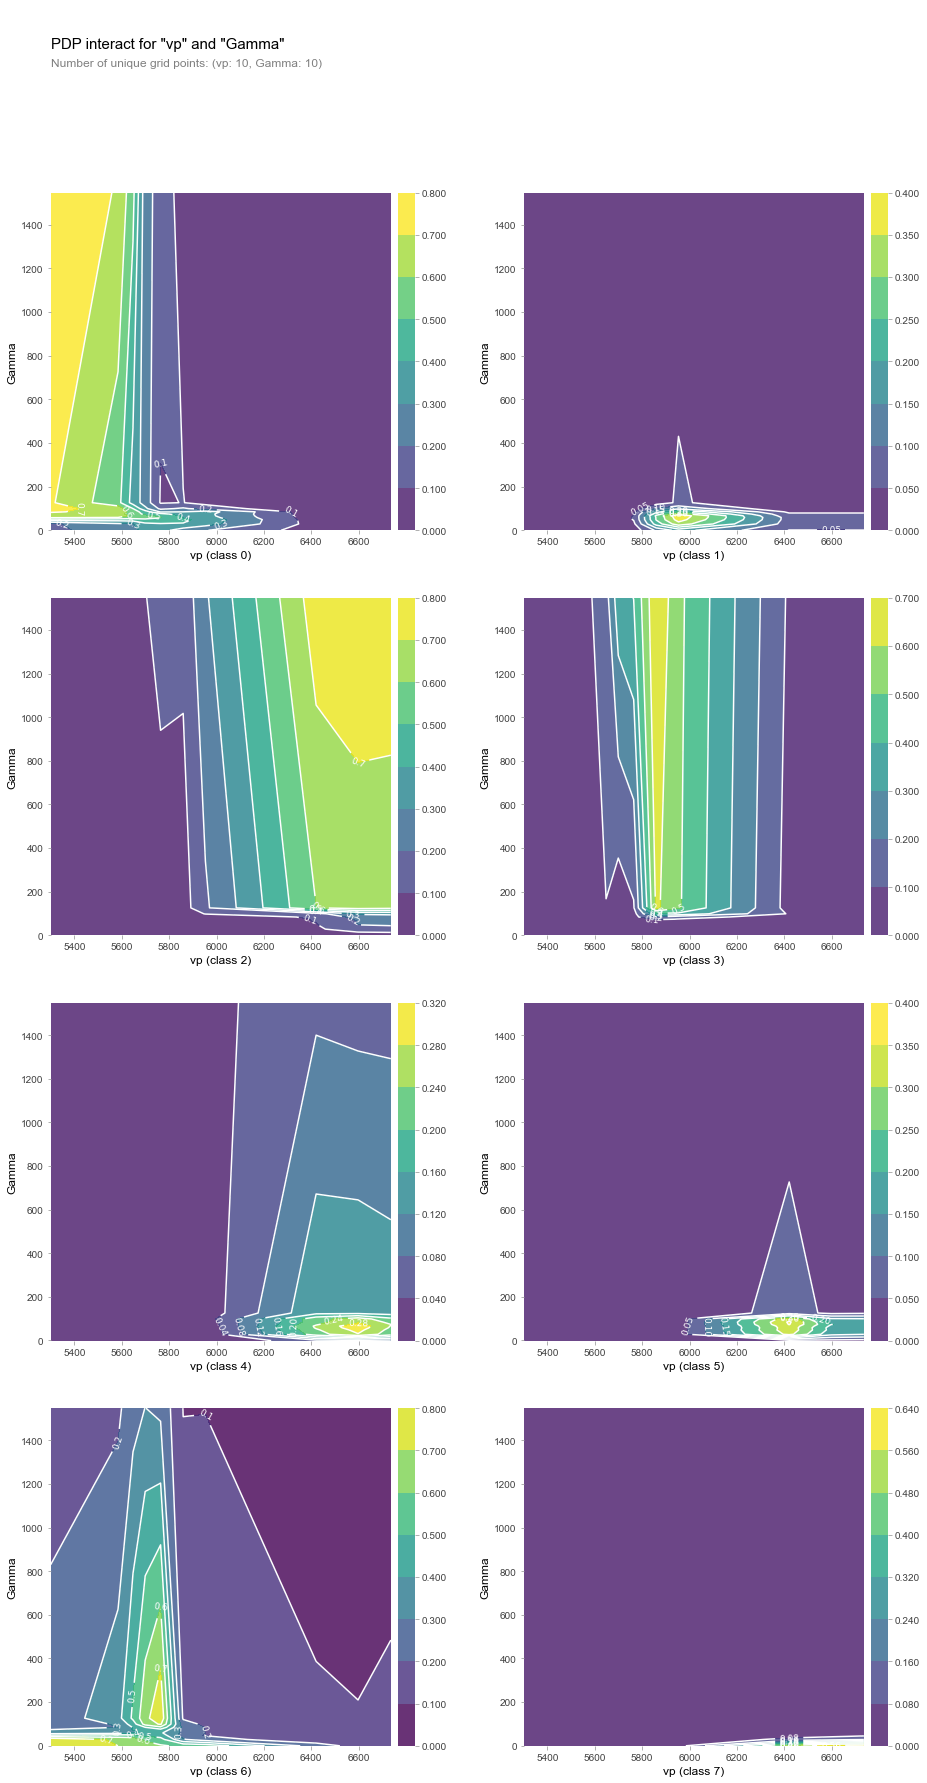

In [89]:
#plotting of interactions between logging features
feature_interactn = ['vp', 'Gamma']
pdp_vp_gamma = pdp.pdp_interact(model = rf_classifier_3,   dataset = pd_train, model_features = features, features = feature_interactn)
pdp.pdp_interact_plot(pdp_vp_gamma, feature_interactn, plot_type = 'contour')
plt.savefig('desktop/rf_vp_gamma_pdp.svg', format = 'svg', dpi = 800)
plt.show()

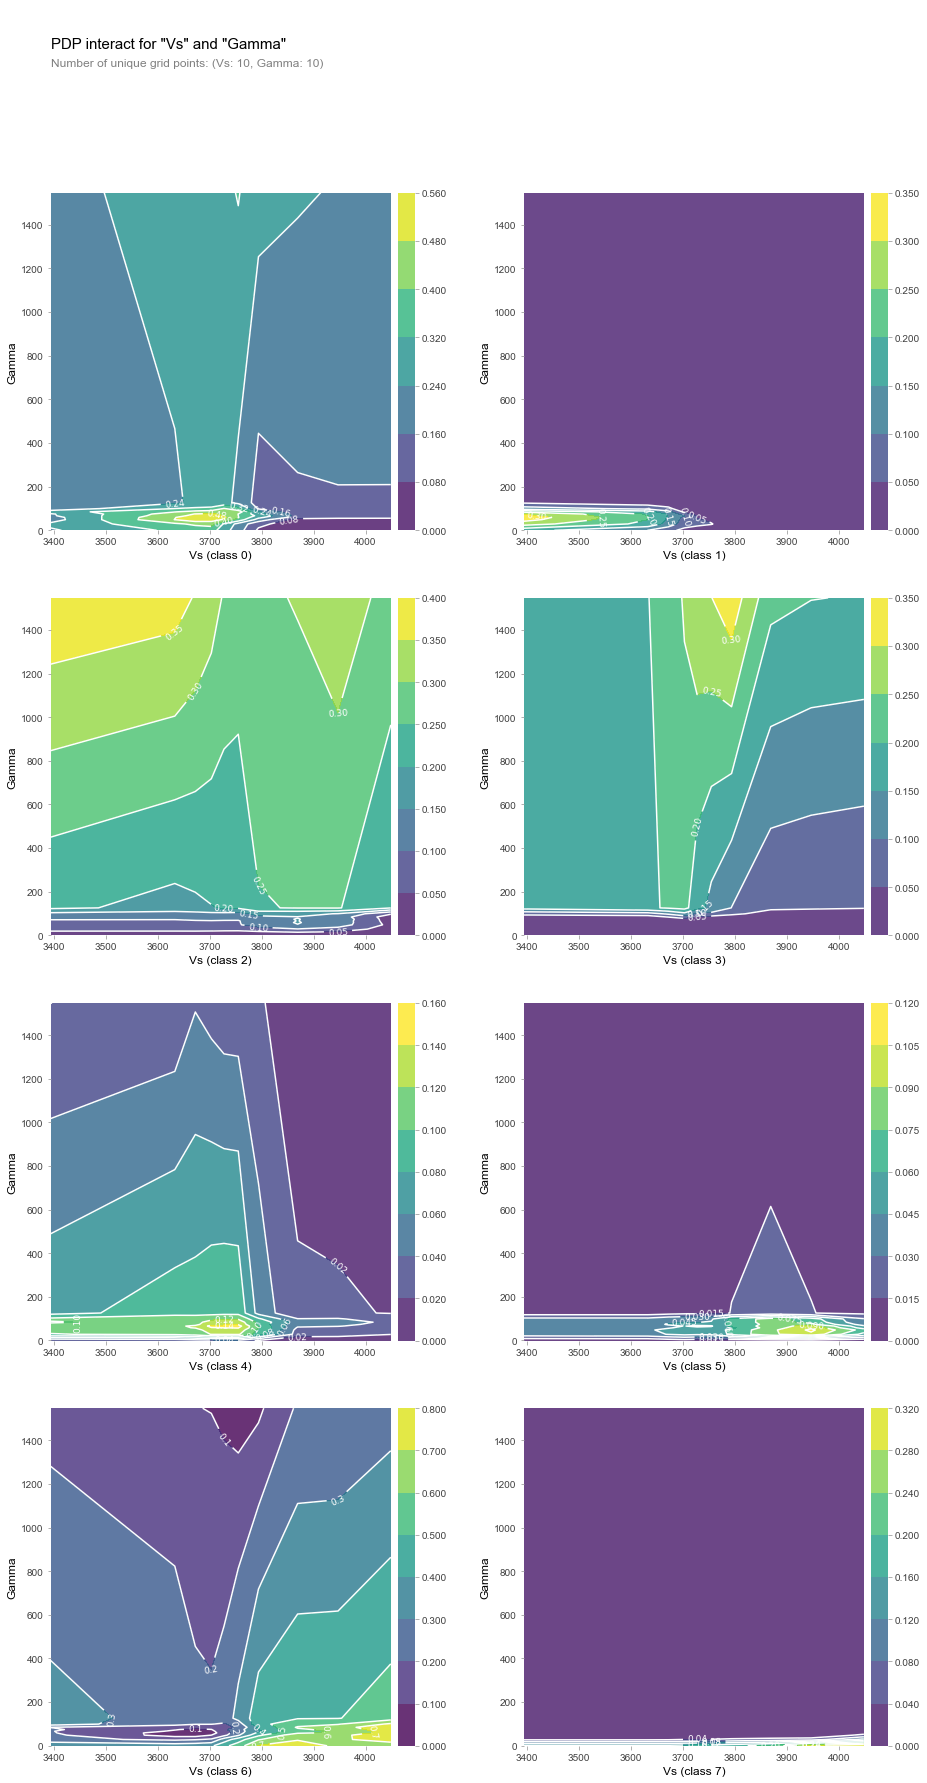

In [28]:
#plotting of interactions between logging features
feature_interactn = ['Vs', 'Gamma']
pdp_vs_gamma = pdp.pdp_interact(model = rf_classifier_3,   dataset = pd_train, model_features = features, features = feature_interactn)
pdp.pdp_interact_plot(pdp_vs_gamma, feature_interactn, plot_type = 'contour')
plt.savefig('desktop/rf_vs_gamma_pdp.svg', format = 'svg', dpi = 800)
plt.show()

In [22]:
from sklearn.inspection import plot_partial_dependence, partial_dependence
from sklearn.inspection import PartialDependenceDisplay

<Figure size 1296x1152 with 0 Axes>

<Figure size 1296x1152 with 0 Axes>

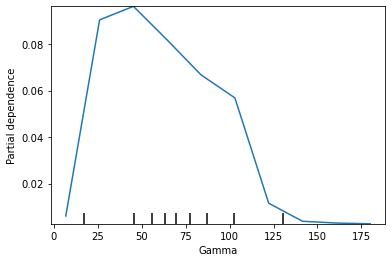

<Figure size 1296x1152 with 0 Axes>

In [35]:
#fig, subplot = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 10))
plt.figure(figsize = (18, 16))
pd_gamma = plot_partial_dependence(rf_classifier_3, pd_train, features = ['Gamma'], grid_resolution =10,  n_jobs = 1, target =5)
plt.figure(figsize = (18, 16))